# Optimizers 

### Understanding Optimization in Deep Learning (Simple Explanation)

Optimization in deep learning is the process of adjusting a model's parameters (weights and biases) to minimize the error (loss) and improve its performance. It is like teaching a model how to learn patterns from data efficiently.

---

### **Example: Finding the Lowest Point on a Mountain**
Imagine you are standing on a mountain, blindfolded, and your goal is to reach the lowest point (valley). Since you cannot see, you feel the ground and take small steps downward. 

- Each step you take is an update to the model's parameters.
- The slope of the ground represents the gradient (direction of steepest descent).
- The valley represents the best set of parameters that minimize the error.

This process is similar to **Gradient Descent**, a popular optimization algorithm in deep learning.

---

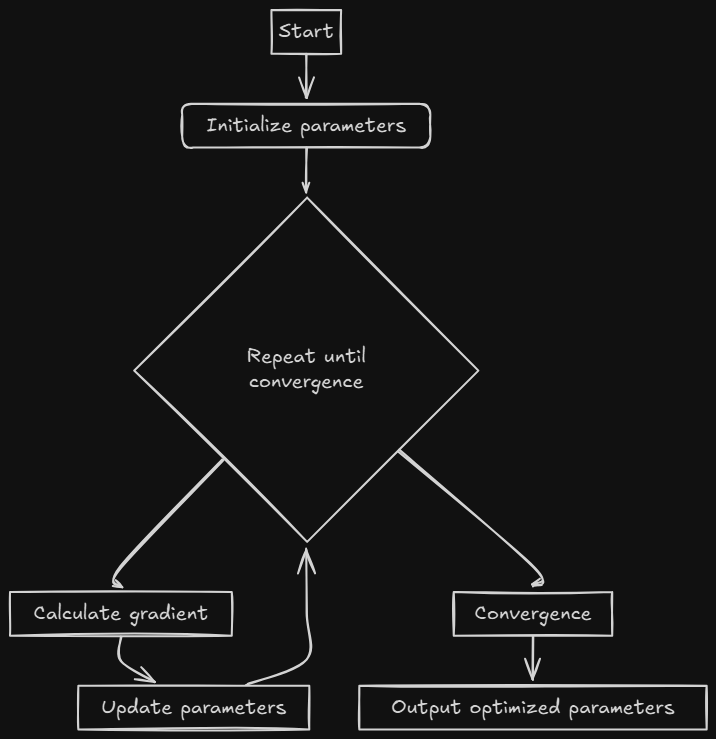

### **Visualization: Loss Function as a 3D Surface**
A deep learning model’s performance is represented by a "loss function," which we try to minimize. The loss function can be visualized as a 3D surface with hills and valleys.

Here’s a simple way to visualize it:

1. **X-axis & Y-axis:** Different model parameters (weights).
2. **Z-axis (Height):** Loss value (error).
3. **Goal:** Move from a high loss value to the lowest point.

Let's generate a **3D plot** of a loss function and show how gradient descent moves towards the minimum.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')

X = [0.5, 2.5]
Y = [0.2, 0.9]

def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x

def do_gradient_descent(w, b, max_epochs=1000, eta=1.0):
    path = [(w, b, error(w, b))]
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        w -= eta * dw
        b -= eta * db
        path.append((w, b, error(w, b)))
    return np.array(path)

# Generate error surface
w_vals = np.linspace(-7, 7, 100)
b_vals = np.linspace(-7, 7, 100)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Gradient descent paths
path1 = do_gradient_descent(-2, -2)
path2 = do_gradient_descent(-4, 6)
plane = np.full((1001), -1)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# First path (w, b = -2, -2)
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='Start at (-2, -2)')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.5)

# Second path (w, b = -4, 6)
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Start at (-4, 6)')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.5)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('Error Surface and Gradient Descent Paths')
ax.set_zlim(-1, 1)
ax.legend()
plt.show()


In the 3D plot, the surface represents the loss function, where high peaks indicate high loss, and the lowest valley represents the optimal parameters. 

The **red points** show the path taken by gradient descent, moving step by step towards the minimum loss. Each step adjusts the model’s parameters to improve its predictions.

This is how optimization helps deep learning models **learn efficiently** and improve performance!

---

### **Steps of Gradient Descent**
1. Start with random values of \( x \) and \( y \).
2. Compute the loss \( L \).
3. Compute gradients (derivatives) of \( L \) with respect to \( x \) and \( y \).
4. Update \( x \) and \( y \) in the direction of decreasing loss.
5. Repeat until we reach the minimum.

Now, let's implement this in PyTorch and visualize the gradient updates.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')

# Simple quadratic error function
def error(w, b):
    return w**2 + b**2

# Gradients of the error function
def grad_w(w, b, x=None, y=None):
    return 2 * w

def grad_b(w, b, x=None, y=None):
    return 2 * b

# Gradient descent with path tracking
def do_gradient_descent(w, b):
    eta = 0.1  # learning rate
    max_epochs = 100
    path = [(w, b, error(w, b))]
    
    for i in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)
        w -= eta * dw
        b -= eta * db
        path.append((w, b, error(w, b)))
    return path

# Generate error surface
w_vals = np.linspace(-7, 7, 100)
b_vals = np.linspace(-7, 7, 100)
W, B = np.meshgrid(w_vals, b_vals)
E = W**2 + B**2  # new error formula

# Gradient descent paths
path1 = np.array(do_gradient_descent(-2, -2))
path2 = np.array(do_gradient_descent(-4, 6))
plane = np.full((path1.shape[0]), -1)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# First path (w, b = -2, -2)
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='Start at (-2, -2)')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', marker='o', alpha=0.5)

# Second path (w, b = -4, 6)
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Start at (-4, 6)')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', marker='o', alpha=0.5)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('Error Surface and Gradient Descent Paths')
ax.set_zlim(-1, 60)
ax.legend()
plt.show()


### **1. What is a Convex and Non-Convex Function?**  

In **optimization**, functions can be classified as **convex** or **non-convex**, which affects how easy or difficult it is to find the optimal solution.

- **Convex Function**: A function where any line segment between two points on the curve stays above or on the curve. This means it has a **single global minimum**.
- **Non-Convex Function**: A function that has **multiple peaks and valleys** (local minima and maxima), making optimization harder because algorithms can get stuck in local minima instead of reaching the best solution.

#### **Visualization of Convex and Non-Convex Functions**  
Let's generate 3D plots to compare these two types of functions.


In [4]:
# Define a convex function: A simple bowl-shaped quadratic function
def convex_function(x, y):
    return x**2 + y**2

# Define a non-convex function: A function with multiple local minima
def non_convex_function(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * (x**2 + y**2)

# Generate mesh grid for plotting
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Compute function values
Z_convex = convex_function(X, Y)
Z_non_convex = non_convex_function(X, Y)

# Plot convex function
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z_convex, cmap='viridis', alpha=0.8)
ax1.set_title("Convex Function (Easy to Optimize)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Loss")

# Plot non-convex function
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z_non_convex, cmap='inferno', alpha=0.8)
ax2.set_title("Non-Convex Function (Hard to Optimize)")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Loss")

plt.show()


### **2. Why is Optimization Crucial in Machine Learning Models?**  
Optimization helps machine learning models **learn efficiently** by minimizing a loss function, which measures how far the model's predictions are from the actual values.

#### **Example: Training a Neural Network**
- The neural network starts with **random weights**.
- It makes predictions and calculates the **loss** (error).
- Optimization algorithms (like **Gradient Descent**) adjust the weights to **reduce the loss**.
- The process continues until the loss is **minimized**, leading to an accurate model.

Without optimization, the model would **never improve** and would fail to make accurate predictions.

---

### **3. How Do Different Loss Landscapes Affect Optimization?**  
The shape of the loss function affects how easily the optimizer finds the best solution.

1. **Convex Loss Landscape**  
   - Has **one global minimum** (best solution).  
   - Optimizers like **Gradient Descent** easily find the minimum.  
   - **Example**: Linear regression, logistic regression.

2. **Non-Convex Loss Landscape**  
   - Has **multiple peaks and valleys** (local minima).  
   - The optimizer may get **stuck in a local minimum** instead of the global minimum.  
   - **Example**: Training deep neural networks, GANs.

#### **Key Takeaways**
- **Convex functions** are easy to optimize.
- **Non-convex functions** require better techniques (e.g., momentum, Adam optimizer) to avoid local minima and find a **good enough** solution.


### **What is Stochastic Gradient Descent (SGD)?**  

**Stochastic Gradient Descent (SGD)** is an optimization algorithm used in machine learning and deep learning to find the best model parameters by minimizing the **loss function**.

---

### **Formula of SGD**  
SGD updates the model parameters (θ) using the following formula:

#                                      **θ=θ−η⋅∇L(θ)**


Where:
- θ = Model parameters (weights)
- η = Learning rate (step size)
- ∇L(θ) = Gradient of the loss function (partial derivatives)

Unlike standard **Gradient Descent**, which uses the entire dataset to compute gradients, **SGD updates parameters using only one randomly selected data point at a time**.  

---

### **How Does SGD Work? (Example)**  

Imagine you are **hiking down a mountain**:
- **Batch Gradient Descent**: Looks at the **entire** landscape before taking a step (slow but precise).
- **SGD**: Takes **small, quick steps** based on the current position (fast but noisy).

Example in a machine learning model:
1. The model predicts an output for **one data point**.
2. The loss (error) is calculated for that point.
3. The model updates its parameters using **only that single point**.
4. It repeats this process for each data point.

---

### **Pros and Cons of SGD**  

#### ✅ **Pros (Advantages)**  
✔ **Faster than Batch Gradient Descent** – Since it updates after each data point, it converges quickly.  
✔ **Works well with large datasets** – Unlike full-batch methods, it does not need to load all data into memory.  
✔ **Avoids local minima** – The randomness of SGD helps escape bad solutions in non-convex loss functions.  

#### ❌ **Cons (Disadvantages)**  
❌ **Noisy updates** – Since it updates based on a single point, the path to the minimum is unstable.  
❌ **May overshoot the minimum** – If the learning rate is too high, it might keep bouncing around without settling.  
❌ **Slower convergence** – The randomness may make it slower compared to batch-based methods.  

---

### **How to Improve SGD?**  
To fix its weaknesses, we use:
- **Momentum**: Helps smooth updates and reduce oscillations.
- **Mini-batch SGD**: Uses small batches instead of a single data point for better stability.
- **Adaptive Learning Rate Methods (Adam, RMSprop)**: Adjust the learning rate automatically for better convergence.

Would you like to see an implementation of SGD in NumPy or PyTorch?

# Momentum

### **How Does Momentum Help Overcome Slow Convergence?**  

Momentum is an **improvement to Stochastic Gradient Descent (SGD)** that helps speed up training and avoid oscillations. It does this by remembering past gradients and **accelerating in the correct direction**.

---

### **Analogy: A Rolling Ball on a Hill**  
Imagine you are **rolling a ball down a valley**:
- **Without Momentum (SGD)**: The ball moves in **zig-zag motions** because it follows the gradient exactly, often slowing down in flat areas.
- **With Momentum**: The ball **gains speed** and moves smoothly toward the bottom, avoiding unnecessary zig-zags.

Just like a ball **keeps rolling** based on past motion, momentum in optimization **remembers previous updates** to make smoother, faster movements.

---

### **Formula for SGD with Momentum**  

Momentum modifies the standard **SGD update rule**:

$$v_t = \beta v_{t-1} - \eta \nabla L(\theta)$$

$$\theta = \theta + v_t$$

Where:
- $v_t$ = Velocity (stores past gradients)
- $\beta$ = Momentum factor (usually between 0.8 to 0.99)
- $\eta$ = Learning rate
- $\nabla L(\theta)$ = Gradient of loss functionize}

Instead of just following the current gradient, **momentum averages past gradients** to move in a consistent direction.

---

### **Visualization: Gradient Descent with and without Momentum**  
We will compare:
1. **Vanilla SGD** (slow and oscillating).
2. **SGD with Momentum** (smoother and faster).

### **Explanation of the Visualization**  
- **Red Line (SGD)**: Moves slowly and takes **zig-zag paths**, especially when the loss surface is steep.  
- **Blue Line (SGD with Momentum)**: Moves **smoother and faster**, avoiding oscillations and reaching the minimum quickly.

---

### **Pros and Cons of Momentum**  

#### ✅ **Pros**  
- **Faster convergence**: Speeds up training by reducing oscillations.  
- **Avoids local minima**: Helps escape flat or bad regions.  
- **Smoother updates**: Reduces noise in gradient updates.  

#### ❌ **Cons**  
- **Tuning is required**: Choosing the right momentum factor (\(\beta\)) is crucial.  
- **May overshoot**: If momentum is too high, it might overshoot the minimum.  

Momentum is widely used in optimizers like **Adam and RMSprop** to improve gradient descent.

# GD comparison with momentum 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')

X = [0.5, 2.5]
Y = [0.2, 0.9]

def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x


def do_momentum_gradient_descent(w, b, max_epochs=1000, eta=1.0, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db
        w -= v_w
        b -= v_b

        path.append((w, b, error(w, b)))

    return np.array(path)

def do_gradient_descent(w, b, max_epochs=1000, eta=1.0):
    path = [(w, b, error(w, b))]
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        w -= eta * dw
        b -= eta * db
        path.append((w, b, error(w, b)))
    return np.array(path)

# Generate error surface
w_vals = np.linspace(-7, 7, 100)
b_vals = np.linspace(-7, 7, 100)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Gradient descent paths
path1 = do_gradient_descent(-2, -2)
path2 = do_momentum_gradient_descent(-2, -2)
plane = np.full((1001), -1)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# First path (w, b = -2, -2)
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='Gradient Descent Start at (-2, -2)')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.5)

# Second path (w, b = -4, 6)
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Momentum Start at (-2, -2)')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.5)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('GD vs GD with Momentum')
ax.set_zlim(-1, 1)
ax.legend()
plt.show()


# a clear difference of GD and momentum on another error surface 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')


def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    return 0.3*(w**2) + 0.2*(b**2)


def grad_w(w, b, x=None, y=None):
    return 0.6 * w

def grad_b(w, b, x=None, y=None):
    return 0.4 * b

def do_gradient_descent(w, b, max_epochs=100, eta=0.1):
    path = [(w, b, error(w, b))]
    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)
        w -= eta * dw
        b -= eta * db
        path.append((w, b, error(w, b)))
    return np.array(path)


def do_momentum_gradient_descent(w, b, max_epochs=100, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0
    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db

        w -= v_w
        b -= v_b

        path.append((w, b, error(w, b)))
    return np.array(path)


# Generate error surface
w_vals = np.linspace(-7, 7, 100)
b_vals = np.linspace(-7, 7, 100)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Gradient descent paths
path1 = do_gradient_descent(-6, 6,eta=0.2)
path2 = do_momentum_gradient_descent(6, 6, eta=0.2, gamma=0.9)
plane = np.full((101), -4)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# First path (w, b = -2, -2)
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='Gradient Descent')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.5)

# Second path (w, b = -4, 6)
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Momentum')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.5)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('GD vs GD with Momentum')
ax.set_zlim(-1, 25)
ax.legend()
plt.show()


# GD and Momentum on different error surface 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')

X = [0.35,3,3.5]
Y = [0.5,0.5,0.5]

def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x


def do_momentum_gradient_descent(w, b, max_epochs=1000, eta=1.0, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db
        w -= v_w
        b -= v_b

        path.append((w, b, error(w, b)))

    return np.array(path)

def do_gradient_descent(w, b, max_epochs=1000, eta=1.0):
    path = [(w, b, error(w, b))]
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        w -= eta * dw
        b -= eta * db
        path.append((w, b, error(w, b)))
    return np.array(path)

# Generate error surface
w_vals = np.linspace(-7, 7, 100)
b_vals = np.linspace(-7, 7, 100)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Gradient descent paths
path1 = do_gradient_descent(2,4)
path2 = do_momentum_gradient_descent(2,4)
plane = np.full((1001), -0.50)

# Plotting
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(W, B, E, cmap='plasma', alpha=0.7)
ax1.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='Gradient Descent')
ax1.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.8)
ax1.set_xlabel('Weight (w)')
ax1.set_ylabel('Bias (b)')
ax1.set_zlabel('Error')
ax1.set_title('Error Surface of Gradient Descent')
ax1.set_zlim(-0.50, 0.75)
ax1.legend()

# Second path (w, b = -4, 6)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(W, B, E, cmap='plasma', alpha=0.7)
ax2.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Momentum')
ax2.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.8)

ax2.set_xlabel('Weight (w)')
ax2.set_ylabel('Bias (b)')
ax2.set_zlabel('Error')
ax2.set_title('Error Surface of Momentum')
ax2.set_zlim(-0.50, 0.75)
ax2.legend()
plt.show()


# contour plot of above 3D graph

In [82]:
# Creating a filled contour plot
plt.contourf(W, B, E)
plt.plot(path1[:, 0], path1[:, 1], plane, color='blue', marker='o', label='Gradient Descent')
plt.plot(path2[:, 0], path2[:, 1], plane, color='red', marker='o', label='Momentum')
# Adding labels and title
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('comparison of GD and GD with momemtum')
plt.xlim(-6,6)
plt.ylim(-6,6)

# Displaying the plot
plt.show()



# **Understanding Momentum in Optimization**  

## **What Happens in SGD and Momentum?**  

In **Stochastic Gradient Descent (SGD)**, each step on the loss function depends entirely on the de **θ=θ−η⋅∇L(θ)**bla f\)). However, in **Momentum-based SGD**, the step is influenced by both the **velocity** and the der$$v_t = \beta v_{t-1} - \eta \nabla L(\theta)$$bl

a f\)). This is why momentum-based optimization takes **larger jumps** and can converge faster.  

---

## **Analogy for Momentum**  

Imagine asking three different people for directions, and all of them point in the **same direction**. Since you are confident, you start moving **faster** toward your destination. However, after a while, you realize that you have **moved too far** and need to ask for directions again.  

This is similar to how **Momentum optimization** works:
- It **prioritizes previous gradients** to calculate the new step.
- This helps accelerate convergence but can also **cause oscillations**.
- Even if momentum **reaches the minimum quickly**, it does not stop immediately due to its accumulated velocity.
- Instead, it **oscillates** around the minimum while gradually er to understand. Let me know if you need any further modifications!

---

## **Understanding the Beta Term in Momentum Formula**  

The momentum update formula is:


$$v_t = \beta v_{t-1} - \eta \nabla L(\theta)$$

$$\theta = \theta + v_t$$




Where:  
- $v_t$ = Velocity (stores past gradients)
- $\beta$ = Momentum factor (usually between 0.8 to 0.99)
- $\eta$ = Learning rate
- $\nabla L(\theta)$ = Gradient of loss function  

### **Effect of Beta Values**  
1. **If \( \beta = 0 \)** → Momentum behaves exactly like **SGD**.  
2. **If \( \beta \) is between 0.5 and 0.9** → The optimizer considers previous velocities, helping to smooth updates and accelerate convergence.  
3. **If \( \beta \) is too high (\( > 0.9 \))** → The optimizer may **overshoot** and oscillate excessively, even moving away from the global minimum.  

---


# Effect of Beta on Momentum

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')

def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    return 0.3*(w**2) + 0.2*(b**2)


def grad_w(w, b, x=None, y=None):
    return 0.6 * w

def grad_b(w, b, x=None, y=None):
    return 0.4 * b

def do_momentum_gradient_descent(w, b, max_epochs=100, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0
    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db

        w -= v_w
        b -= v_b

        path.append((w, b, error(w, b)))
    return np.array(path)

# Generate error surface
w_vals = np.linspace(-7, 7, 100)
b_vals = np.linspace(-7, 7, 100)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Gradient descent paths
path1 = do_momentum_gradient_descent(-6, 6, eta=0.2, gamma=0.5)
path2 = do_momentum_gradient_descent(6, 6, eta=0.2, gamma=0.9)
path3 = do_momentum_gradient_descent(-6, -6, eta=0.2, gamma=0.3)
path4 = do_momentum_gradient_descent(6, -6, eta=0.2, gamma=0.99)
plane = np.full((101), -4)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# First path 
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='Beta = 0.5')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.5)

# Second path 
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Beta = 0.9')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.5)

# Third path
ax.plot(path3[:, 0], path3[:, 1], path3[:, 2], color='green', marker='o', label='Beta = 0.3')
ax.plot(path3[:, 0], path3[:, 1], plane, color='green', linestyle='--', alpha=0.5)

# Path fourth
ax.plot(path4[:, 0], path4[:, 1], path4[:, 2], color='#45ffbb', marker='o', label='Beta = 0.99')
ax.plot(path4[:, 0], path4[:, 1], plane, color='#45ffbb', linestyle='--', alpha=1)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('Effect of beta on momentum')
ax.set_zlim(-4, 25)
ax.legend()
plt.show()


## **Why Does Momentum Escape Local Minima but Not Global Minima?**  

### **Real-World Analogy: Rolling Ball in a Valley**  

Imagine dropping a **rolling ball** into a deep valley:  
- When the ball **reaches the bottom**, it **does not stop immediately** due to momentum.  
- Instead, it moves **upward** slightly before settling down.  
- To escape a **shallow local minimum**, the ball only needs a **small push**.  
- But to escape a **deep global minimum**, it requires **much more energy**.  

### **In Momentum Optimization:**  
- The optimizer moves **fast** towards the minimum.  
- If it encounters a **local minimum**, it can escape due to accumulated momentum.  
- However, when it reaches the **global minimum**, the gradient forces it back, and it gradually stabilizes.  

Thus, momentum helps **avoid local minima** while ensuring that the optimizer eventually settles in the **global minimum**.  

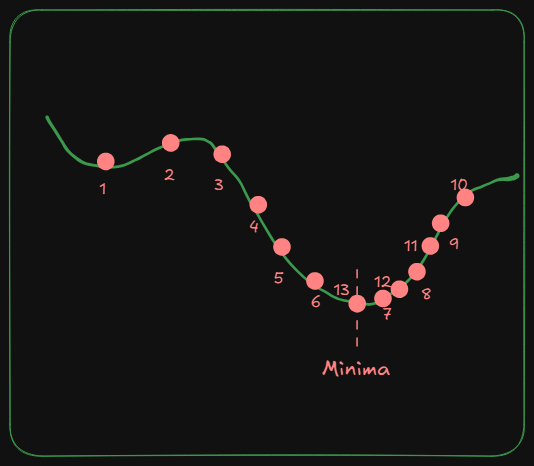

# NAG Nesterov Accelerated Gradient

### **Understanding Nesterov Accelerated Gradient (NAG) and How It Overcomes Oscillation in Momentum**  

#### **Why Does Momentum Cause Oscillations?**  
Momentum helps speed up convergence by using a velocity term that accumulates past gradients. However, this can also lead to **overshooting** and oscillations, especially near the minimum. The optimizer moves too fast and keeps bouncing around instead of settling smoothly.  

---

## **How NAG (Nesterov Accelerated Gradient) Solves the Problem**  

### **Key Idea of NAG:**  
Instead of computing the gradient at the current position \( x_t \), we **first take a step** in the direction of the velocity \( v_t \) and then compute the gradient at this **lookahead position**.  

### **Mathematical Formulation**  

#### **Momentum Update (Standard Momentum SGD)**
\[
v_t = \beta v_{t-1} - \eta \nabla f(x_t)
\]
\[
x_{t+1} = x_t + v_t
\]

#### **NAG Update (Lookahead Gradient Calculation)**
\[
v_t = \beta v_{t-1} - \eta \nabla f(x_t + \beta v_{t-1})
\]
\[
x_{t+1} = x_t + v_t
\]

### **Why Does This Help?**
- Instead of blindly following momentum, NAG **checks ahead** and adjusts the step size accordingly.
- This **reduces oscillations** near minima, making convergence **smoother and more stable**.
- It acts as a correction mechanism to **avoid overshooting**.

---

## **Analogy: Running Down a Hill with a Map**  

Imagine you are **running down a hill** with **momentum**. In standard momentum optimization:
- You **run fast** based on past speed without checking ahead.
- Sometimes, you **overshoot** and have to backtrack.

Now, with **Nesterov Accelerated Gradient (NAG)**:
- Before making a big jump, you **look ahead** using a map.
- If you see a **steep drop**, you slow down.
- If the path is clear, you continue smoothly.

This **lookahead adjustment** helps reduce unnecessary back-and-forth movements, leading to **faster and smoother convergence**.

---

## **Code: Visualizing Momentum vs. NAG (3D Loss Surface)**  


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')

X = [0.5, 2.5]
Y = [0.2, 0.9]

def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x


def do_momentum_gradient_descent(w, b, max_epochs=100, eta=1.0, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db
        w -= v_w
        b -= v_b

        path.append((w, b, error(w, b)))

    return np.array(path)

def do_nesterov_accelerated_gradient_descent(w, b, max_epochs=100, eta=1.0, gamma=0.9):
    path = [(w, b, error(w, b))]
    prev_v_w, prev_v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        # Lookahead step
        lookahead_w = w - gamma * prev_v_w
        lookahead_b = b - gamma * prev_v_b

        for x, y in zip(X, Y):
            dw += grad_w(lookahead_w, lookahead_b, x, y)
            db += grad_b(lookahead_w, lookahead_b, x, y)

        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db

        w -= v_w
        b -= v_b

        prev_v_w = v_w
        prev_v_b = v_b

        path.append((w, b, error(w, b)))

    return np.array(path)


# Generate error surface
w_vals = np.linspace(-7, 7, 100)
b_vals = np.linspace(-7, 7, 100)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Gradient descent paths
path1 = do_nesterov_accelerated_gradient_descent(-2, -2)
path2 = do_momentum_gradient_descent(-2, -2)
plane = np.full((101), -1)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# First path (w, b = -2, -2)
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='NAG')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.5)

# Second path (w, b = -4, 6)
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Momentum')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.5)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('NAG vs Momentum lr=1.0, epochs=100')
ax.set_zlim(-1, 1)
ax.legend()
plt.show()


# NAG VS Momentum on other error surface

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')

X = [0.35,3,3.5]
Y = [0.5,0.5,0.5]

def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x


def do_momentum_gradient_descent(w, b, max_epochs=100, eta=1.0, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db
        w -= v_w
        b -= v_b

        path.append((w, b, error(w, b)))

    return np.array(path)

def do_nesterov_accelerated_gradient_descent(w, b, max_epochs=100, eta=1.0, gamma=0.9):
    path = [(w, b, error(w, b))]
    prev_v_w, prev_v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        # Lookahead step
        lookahead_w = w - gamma * prev_v_w
        lookahead_b = b - gamma * prev_v_b

        for x, y in zip(X, Y):
            dw += grad_w(lookahead_w, lookahead_b, x, y)
            db += grad_b(lookahead_w, lookahead_b, x, y)

        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db

        w -= v_w
        b -= v_b

        prev_v_w = v_w
        prev_v_b = v_b

        path.append((w, b, error(w, b)))

    return np.array(path)


# Generate error surface
w_vals = np.linspace(-7, 7, 100)
b_vals = np.linspace(-7, 7, 100)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Gradient descent paths
path1 = do_nesterov_accelerated_gradient_descent(-2, -2)
path2 = do_momentum_gradient_descent(-2, -2)
plane = np.full((101), -0.5)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# First path (w, b = -2, -2)
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='NAG')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.5)

# Second path (w, b = -4, 6)
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Momentum')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.5)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('NAG vs Momentum')
ax.set_zlim(-0.5, 0.75)
ax.legend()
plt.show()


# a clear difference between NAG and Momentum

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')


def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    return 0.3*(w**2) + 0.2*(b**2)


def grad_w(w, b, x=None, y=None):
    return 0.6 * w

def grad_b(w, b, x=None, y=None):
    return 0.4 * b

def do_nesterov_accelerated_gradient_descent(w, b, max_epochs=100, eta=1.0, gamma=0.9):
    path = [(w, b, error(w, b))]
    prev_v_w, prev_v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        # Lookahead step
        lookahead_w = w - gamma * prev_v_w
        lookahead_b = b - gamma * prev_v_b

        for x, y in zip(X, Y):
            dw += grad_w(lookahead_w, lookahead_b, x, y)
            db += grad_b(lookahead_w, lookahead_b, x, y)

        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db

        w -= v_w
        b -= v_b

        prev_v_w = v_w
        prev_v_b = v_b

        path.append((w, b, error(w, b)))

    return np.array(path)


def do_momentum_gradient_descent(w, b, max_epochs=100, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0
    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db

        w -= v_w
        b -= v_b

        path.append((w, b, error(w, b)))
    return np.array(path)


# Generate error surface
w_vals = np.linspace(-7, 7, 100)
b_vals = np.linspace(-7, 7, 100)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Gradient descent paths
path1 = do_nesterov_accelerated_gradient_descent(-6, 6,eta=0.2)
path2 = do_momentum_gradient_descent(6, 6, eta=0.2, gamma=0.9)
plane = np.full((101), -4)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# First path (w, b = -2, -2)
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='NAG')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.5)

# Second path (w, b = -4, 6)
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Momentum')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.5)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('NAG vs Momentum')
ax.set_zlim(-1, 25)
ax.legend()
plt.show()


### **Explanation of the Code**  
- We define a **3D loss function** with a wavy shape to simulate a complex optimization landscape.  
- We initialize two optimizers:
  - **SGD with Momentum**
  - **SGD with NAG**  
- We update the parameters for 50 iterations, tracking their movement.
- We plot both trajectories on a **3D surface** to compare how they navigate the loss landscape.

---

## **Pros and Cons of NAG**  

### **✅ Advantages of NAG**  
- **Faster convergence** than standard momentum.  
- **Reduces oscillations** near the minimum.  
- **More accurate updates** by using a lookahead step.  

### **❌ Disadvantages of NAG**  
- **Computationally expensive** since it requires an extra gradient calculation.  
- **Sensitive to hyperparameters** (learning rate and momentum values).  
- **May still overshoot** if learning rate is too high.
- **May not escape local Minima** Because of reduced oscillations  

---

## **Conclusion**  
- **Momentum accelerates optimization** but can **overshoot** and oscillate near minima.  
- **Nesterov Accelerated Gradient (NAG)** improves this by **looking ahead before taking a step**, reducing oscillations.  
- NAG **smoothly converges** to the minimum, making it a better choice for many deep learning tasks.  

This structured explanation, along with a **real-world analogy, formulas, and 3D visualizations**, makes it easier to understand how **NAG improves optimization**. Let me know if you need further clarification!

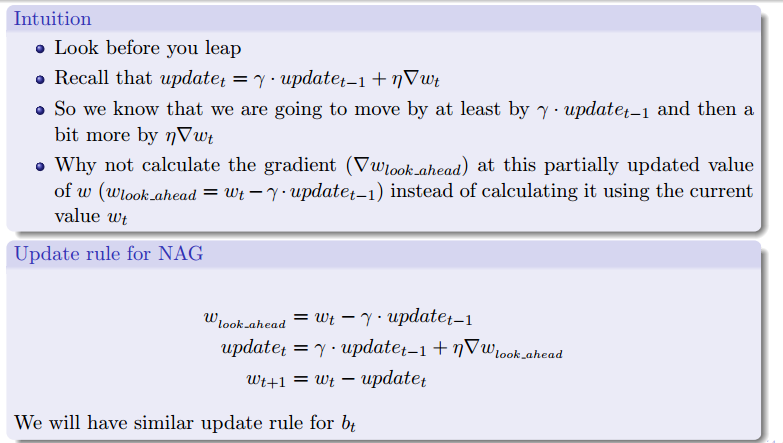

# AdaGrad

## Gradient Descent with Adaptive Learning Rate


---

## 🔹 What is the Elongated Bowl Problem?

The **elongated bowl problem** refers to the shape of the **loss function surface** during optimization:

- Imagine a **bowl** that is **narrow and steep in one direction**, and **flat and wide in another direction**.
- This is a common problem in high-dimensional spaces when some parameters change more rapidly than others.

### Mathematical Example:
A simple function:
```python
f(x, y) = 0.1 * x² + y²
```

- Along the `x`-axis, the slope is **very shallow** (0.01).
- Along the `y`-axis, the slope is **very steep** (1.0).
- So the loss surface looks like a stretched or **elongated bowl**.



In [12]:
# Generating data
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z1 = ((0.1 * (X**2)) + (Y**2))
Z2 = ((X**2) + (Y**2))

# Creating a filled contour plot
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.contourf(X, Y, Z1,levels=20,cmap="viridis")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Elongated Bowl')

plt.subplot(122)
plt.contourf(X, Y, Z2,levels=20,cmap="viridis")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('evenly Bowl')

# Displaying the plot
plt.show()

---

## 🔹 How Does Sparse Data Create This Problem?

A **sparse dataset** means most input features are **zeros**, and only a few are non-zero.

- In such data, **some features contribute a lot**, while **others contribute very little**.
- The gradients for parameters associated with frequent features are **large**, and for rare features are **tiny**.

This creates:
- A loss surface that is **steep in some directions** (frequent features),
- **Flat in others** (rare features),
- So, again, the **elongated bowl** shape.

---

## 🔹 Why Do SGD, Momentum, and NAG Fail?

### 1. **SGD** (Stochastic Gradient Descent)
- Uses **the same learning rate for all directions**.
- Takes **small steps** in the flat direction and **oscillates** in the steep direction.
- Ends up **zig-zagging slowly** toward the minimum.

### 2. **Momentum**
- Adds "velocity" to updates to smooth the path.
- But still uses **uniform learning rate** → still overshoots in the steep direction and struggles in the flat one.

### 3. **NAG** (Nesterov Accelerated Gradient)
- Tries to **look ahead** and make smarter updates.
- Still struggles with **different gradient magnitudes** in each direction.

---

## 🔁 Real-Life Analogy

Imagine you're a ball rolling down a **long, narrow valley**:

- **Steep sides** (like y-direction) pull you quickly → you keep bouncing side-to-side.
- **Flat valley floor** (like x-direction) moves you slowly → you crawl forward.
- You keep **zig-zagging** and barely making progress.

That’s what happens with **SGD, Momentum, and NAG** on an **elongated error surface**.


## Analogy to understand the need of Adagrad 

---

**"Think of an upside-down valley or an inverted cone. You want to reach the bottom (the minimum) of the valley. You start a car and drive it downward. In this scenario, imagine two vectors: one pointing in the forward direction and the other pointing downward.**

**Now, think of a gradient where both vectors are equal. The resultant vector would lead directly to the minimum. But in the case of an elongated bowl, where one side is steeper than the other, the gradient consists of one large and one small component. This causes the resultant vector to shift toward the larger component, which tells the gradient to take a larger step in that direction, pulling the car off-course from the optimal path."**

---

---

## 🔹 How Does Sparse Data Create This Problem?

A **sparse dataset** means most input features are **zeros**, and only a few are non-zero.

- In such data, **some features contribute a lot**, while **others contribute very little**.
- The gradients for parameters associated with frequent features are **large**, and for rare features are **tiny**.

This creates:
- A loss surface that is **steep in some directions** (frequent features),
- **Flat in others** (rare features),
- So, again, the **elongated bowl** shape.

---

## 🔹 Why Do SGD, Momentum, and NAG Fail?

### 1. **SGD** (Stochastic Gradient Descent)
- Uses **the same learning rate for all directions**.
- Takes **small steps** in the flat direction and **oscillates** in the steep direction.
- Ends up **zig-zagging slowly** toward the minimum.

### 2. **Momentum**
- Adds "velocity" to updates to smooth the path.
- But still uses **uniform learning rate** → still overshoots in the steep direction and struggles in the flat one.

### 3. **NAG** (Nesterov Accelerated Gradient)
- Tries to **look ahead** and make smarter updates.
- Still struggles with **different gradient magnitudes** in each direction.

---

## 🔁 Real-Life Analogy

Imagine you're a ball rolling down a **long, narrow valley**:

- **Steep sides** (like y-direction) pull you quickly → you keep bouncing side-to-side.
- **Flat valley floor** (like x-direction) moves you slowly → you crawl forward.
- You keep **zig-zagging** and barely making progress.

That’s what happens with **SGD, Momentum, and NAG** on an **elongated error surface**.

---

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')

X = [0.35,3,3.5]
Y = [0.5,0.5,0.5]

def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x


def do_momentum_gradient_descent(w, b, max_epochs=1000, eta=1.0, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db
        w -= v_w
        b -= v_b

        path.append((w, b, error(w, b)))

    return np.array(path)

def do_nesterov_accelerated_gradient_descent(w, b, max_epochs=1000, eta=1.0, gamma=0.9):
    path = [(w, b, error(w, b))]
    prev_v_w, prev_v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        # Lookahead step
        lookahead_w = w - gamma * prev_v_w
        lookahead_b = b - gamma * prev_v_b

        for x, y in zip(X, Y):
            dw += grad_w(lookahead_w, lookahead_b, x, y)
            db += grad_b(lookahead_w, lookahead_b, x, y)

        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db

        w -= v_w
        b -= v_b

        prev_v_w = v_w
        prev_v_b = v_b

        path.append((w, b, error(w, b)))

    return np.array(path)

def do_gradient_descent(w, b, max_epochs=1000, eta=1.0):
    path = [(w, b, error(w, b))]
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        w -= eta * dw
        b -= eta * db
        path.append((w, b, error(w, b)))
    return np.array(path)



# Generate error surface
w_vals = np.linspace(-7, 7, 100)
b_vals = np.linspace(-7, 7, 100)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Gradient descent paths
path1 = do_nesterov_accelerated_gradient_descent(-3, -1)
path2 = do_momentum_gradient_descent(-3, -1)
path3 = do_gradient_descent(-3,-1,eta=0.1)
plane = np.full((1001), -1)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# First path (w, b = -2, -2)
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='NAG')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.5)

# Second path (w, b = -4, 6)
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Momentum')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.5)

#third path 
ax.plot(path3[:, 0], path3[:, 1], path3[:, 2], color='#141414', marker='o', label='Gradient Descent')
ax.plot(path3[:, 0], path3[:, 1], plane, color='#141414', linestyle='--', alpha=0.5)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('NAG vs Momentum')
ax.set_zlim(-1, 1)
ax.legend()
plt.show()


# a clear visualization on AdaGrad

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')


def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    return 0.7*(w**2) + 0.1*(b**2)


def grad_w(w, b, x=None, y=None):
    return 1.4 * w

def grad_b(w, b, x=None, y=None):
    return 0.2 * b

def do_nesterov_accelerated_gradient_descent(w, b, max_epochs=1000, eta=1.0, gamma=0.9):
    path = [(w, b, error(w, b))]
    prev_v_w, prev_v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        # Lookahead step
        lookahead_w = w - gamma * prev_v_w
        lookahead_b = b - gamma * prev_v_b

        for x, y in zip(X, Y):
            dw += grad_w(lookahead_w, lookahead_b, x, y)
            db += grad_b(lookahead_w, lookahead_b, x, y)

        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db

        w -= v_w
        b -= v_b

        prev_v_w = v_w
        prev_v_b = v_b

        path.append((w, b, error(w, b)))

    return np.array(path)


def do_momentum_gradient_descent(w, b, max_epochs=1000, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0
    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db

        w -= v_w
        b -= v_b

        path.append((w, b, error(w, b)))
    return np.array(path)


def do_gradient_descent(w, b,eta = 0.1):
    max_epochs = 1000
    path = [(w, b, error(w, b))]
    
    for i in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)
        w -= eta * dw
        b -= eta * db
        path.append((w, b, error(w, b)))
    return np.array(path)


# Generate error surface
w_vals = np.linspace(-10, 10, 1000)
b_vals = np.linspace(-10, 10, 1000)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Gradient descent paths
path1 = do_nesterov_accelerated_gradient_descent(-6, 6,eta=0.1, gamma=0.9)
path2 = do_momentum_gradient_descent(6, 6, eta=0.1, gamma=0.9)
path3 = do_gradient_descent(6,-6,eta=0.1)
plane = np.full((1001), -4)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# First path (w, b = -2, -2)
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='NAG')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.5)

# Second path (w, b = -4, 6)
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Momentum')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.5)

#third path 
ax.plot(path3[:, 0], path3[:, 1], path3[:, 2], color='green', marker='o', label='Gradient Descent')
ax.plot(path3[:, 0], path3[:, 1], plane, color='green', linestyle='--', alpha=0.5)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('GD, Momentum and NAG on Elongated bowl error surface')
ax.set_zlim(-1, 25)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.legend()
plt.show()


In [ ]:
################################3

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')

X = [0.35, 3, 3.5]
Y = [0.5, 0.5, 0.5]

def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x

def do_momentum_gradient_descent(w, b, max_epochs=1000, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db
        w -= v_w
        b -= v_b

        path.append((w, b, error(w, b)))

    return np.array(path)

def do_nesterov_accelerated_gradient_descent(w, b, max_epochs=1000, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    prev_v_w, prev_v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        lookahead_w = w - gamma * prev_v_w
        lookahead_b = b - gamma * prev_v_b

        for x, y in zip(X, Y):
            dw += grad_w(lookahead_w, lookahead_b, x, y)
            db += grad_b(lookahead_w, lookahead_b, x, y)

        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db

        w -= v_w
        b -= v_b

        prev_v_w = v_w
        prev_v_b = v_b

        path.append((w, b, error(w, b)))

    return np.array(path)

def do_gradient_descent(w, b, max_epochs=1000, eta=0.1):
    path = [(w, b, error(w, b))]
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        w -= eta * dw
        b -= eta * db
        path.append((w, b, error(w, b)))
    return np.array(path)

def do_adagrad(w, b, max_epochs=1000, eta=0.1):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0
    eps = 1e-8

    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        v_w += dw ** 2
        v_b += db ** 2

        w -= (eta / np.sqrt(v_w + eps)) * dw
        b -= (eta / np.sqrt(v_b + eps)) * db

        path.append((w, b, error(w, b)))

    return np.array(path)

# Generate error surface
w_vals = np.linspace(-7, 7, 100)
b_vals = np.linspace(-7, 7, 100)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Compute gradient descent paths
path1 = do_nesterov_accelerated_gradient_descent(-3, -1)
path2 = do_momentum_gradient_descent(-3, -1)
path3 = do_gradient_descent(-3, -1, eta=0.1)
path4 = do_adagrad(-3, -1)
plane = np.full((1001), -1)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# Nesterov
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='NAG')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.5)

# Momentum
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Momentum')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.5)

# Gradient Descent
ax.plot(path3[:, 0], path3[:, 1], path3[:, 2], color='black', marker='o', label='Gradient Descent')
ax.plot(path3[:, 0], path3[:, 1], plane, color='black', linestyle='--', alpha=0.5)

# Adagrad
ax.plot(path4[:, 0], path4[:, 1], path4[:, 2], color='green', marker='o', label='Adagrad')
ax.plot(path4[:, 0], path4[:, 1], plane, color='green', linestyle='--', alpha=0.5)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('NAG vs Momentum vs Gradient Descent vs Adagrad')
ax.set_zlim(-1, 1)
ax.legend()
plt.show()


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')


def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    return 0.7*(w**2) + 0.1*(b**2)


def grad_w(w, b, x=None, y=None):
    return 1.4 * w

def grad_b(w, b, x=None, y=None):
    return 0.2 * b

def do_nesterov_accelerated_gradient_descent(w, b, max_epochs=1000, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    prev_v_w, prev_v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        # Lookahead step
        lookahead_w = w - gamma * prev_v_w
        lookahead_b = b - gamma * prev_v_b

        for x, y in zip(X, Y):
            dw += grad_w(lookahead_w, lookahead_b, x, y)
            db += grad_b(lookahead_w, lookahead_b, x, y)

        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db

        w -= v_w
        b -= v_b

        prev_v_w = v_w
        prev_v_b = v_b

        path.append((w, b, error(w, b)))

    return np.array(path)


def do_momentum_gradient_descent(w, b, max_epochs=1000, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0
    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db

        w -= v_w
        b -= v_b

        path.append((w, b, error(w, b)))
    return np.array(path)


def do_gradient_descent(w, b,eta = 0.1):
    max_epochs = 1000
    path = [(w, b, error(w, b))]
    
    for i in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)
        w -= eta * dw
        b -= eta * db
        path.append((w, b, error(w, b)))
    return np.array(path)

def do_adagrad_gradient_descent(w, b, max_epochs=1000, eta=0.1, epsilon=1e-8):
    path = [(w, b, error(w, b))]
    
    # Accumulators for squared gradients
    gw_squared, gb_squared = 0, 0

    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        gw_squared += dw**2
        gb_squared += db**2

        w -= (eta / np.sqrt(gw_squared + epsilon)) * dw
        b -= (eta / np.sqrt(gb_squared + epsilon)) * db

        path.append((w, b, error(w, b)))
        
    return np.array(path)


# Generate error surface
w_vals = np.linspace(-8, 8, 1000)
b_vals = np.linspace(-8, 8, 1000)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Gradient descent paths
path1 = do_nesterov_accelerated_gradient_descent(-6, 6,eta=0.1, gamma=0.9)
path2 = do_momentum_gradient_descent(6, 6, eta=0.1, gamma=0.9)
path3 = do_gradient_descent(6,-6,eta=0.1)
path4 = do_adagrad_gradient_descent(-6, -6, eta=0.1)
plane = np.full((1001), -4)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# First path (w, b = -2, -2)
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='NAG')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.5)

# Second path (w, b = -4, 6)
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Momentum')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.5)

#third path 
ax.plot(path3[:, 0], path3[:, 1], path3[:, 2], color='green', marker='o', label='Gradient Descent')
ax.plot(path3[:, 0], path3[:, 1], plane, color='green', linestyle='--', alpha=0.5)

# Fourth path (Adagrad)
ax.plot(path4[:, 0], path4[:, 1], path4[:, 2], color='purple', marker='o', label='Adagrad')
ax.plot(path4[:, 0], path4[:, 1], plane, color='purple', linestyle='--', alpha=0.5)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('GD, Momentum and NAG on Elongated bowl error surface')
ax.set_zlim(-1, 25)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.legend()
plt.show()


## 🔹 Why Do We Need Adaptive Learning Rate?

We need optimizers that:
- Take **large steps** in directions with **small gradients** (flat).
- Take **small steps** in directions with **large gradients** (steep).

This is where **adaptive learning rate methods** come in, like **AdaGrad**.

---

## 🔹 How Does AdaGrad Solve It?

AdaGrad **adapts** the learning rate for each parameter **individually** based on past gradients.

### Formula:

For each parameter θᵢ:

```
θᵢ = θᵢ - (η / √(Gᵢ + ε)) * ∇θᵢ
```

Where:
- `η` is the learning rate,
- `∇θᵢ` is the gradient of parameter i,
- `Gᵢ` is the **sum of squares of past gradients** of parameter i,
- `ε` is a small constant to avoid division by zero.

### What It Means:
- If a parameter has seen **large gradients**, its learning rate **shrinks** over time.
- If it has seen **small gradients**, the learning rate **remains large**.
- This balances the updates and **fixes the zig-zag** path in elongated bowls.

---

### 🔍 Simple Example:

Let's say you have two parameters:

| Parameter | Gradient History     | AdaGrad Step Size Behavior |
|-----------|----------------------|-----------------------------|
| `x`       | Small gradients      | Step size remains large    |
| `y`       | Large gradients      | Step size shrinks          |

So:
- AdaGrad takes **big steps along `x`** to make progress.
- Takes **small steps along `y`** to avoid overshooting.

You **move more directly toward the minimum** without zig-zagging.

---

## ✅ Pros and ❌ Cons of AdaGrad

### ✅ Pros:
- Excellent for **sparse data** (like NLP, recommendation systems).
- Automatically adjusts learning rates for each parameter.
- Solves the **elongated bowl problem** effectively.

### ❌ Cons:
- Accumulates gradients over time → learning rate **keeps decreasing**.
- Eventually, steps become **so small** that learning **stops**.
- Not ideal for long training on dense data.

---

## ✅ Summary Table

| Concept                        | Explanation                                                                 |
|-------------------------------|-----------------------------------------------------------------------------|
| Elongated Bowl Problem        | Loss surface with steep vs. flat directions (e.g., f(x, y) = 0.01x² + y²)   |
| Sparse Dataset Impact         | Creates uneven gradients → elongated loss surface                          |
| SGD/Momentum/NAG Issue        | Use same learning rate → zig-zag or oscillate → slow convergence            |
| Need for Adaptive Learning    | Different learning rates help handle steep vs. flat directions              |
| How AdaGrad Works             | Shrinks learning rate based on past gradient history per parameter          |
| AdaGrad Formula               | θᵢ = θᵢ - (η / √(Gᵢ + ε)) * ∇θᵢ                                             |
| Pros                          | Great for sparse data, solves zig-zag, no tuning per parameter              |
| Cons                          | Learning rate shrinks too much over time → can stop learning                |

---

If you want, I can show you a **visual comparison of AdaGrad vs SGD** on an elongated bowl using matplotlib. Just let me know.

# Adadelta or RMS prop

Certainly! Let's delve into how **Adadelta** and **RMSProp** address the limitations of **Adagrad**, particularly in the context of the **elongated bowl problem**.

---

## 🧠 Understanding the Challenge
In optimization landscapes resembling an **elongated bowl**, the curvature varies significantly across dimensions—steep in some directions and flat in others This disparity causes standard optimizers like **SGD**, **Momentum**, and **NAG** to struggle, often leading to inefficient zig-zagging paths toward the minimum
**Adagrad** attempts to mitigate this by adapting learning rates per parameter, scaling them inversely with the square root of the sum of all historical squared gradients While effective initially, Adagrad's accumulation of squared gradients can cause the learning rates to decay excessively, eventually halting progress before reaching the minimum

---

## ⚙️ How Adadelta and RMSProp Address the Issue

### 🔹 RMSProp (Root Mean Square Propagation)

**Concept** RMSProp modifies Adagrad by introducing a decaying average of past squared gradients, preventing the learning rate from diminishing too rapidl.

**Update Rule**:

1 Compute the decaying average of squared gradient:

   $$
   E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) g_t^2
   $$

   $$
    \( \gamma \) is  the  decay  rate  (commonly set to 0.9.
   $$

2 Update parameter:

   $$
   \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \cdot g_t
   $$
   
   $$
    \( \eta \) is  the  learning  rate
   $$

   $$
    \( \epsilon \) is a small constant to prevent division by zero.
   $$

**Why It Works** By maintaining a moving average of squared gradients, RMSProp ensures that learning rates remain adaptive and do not decay excessively, allowing for more consistent progress toward the minimum, especially in scenarios with varying gradient magnitude.

### 🔹 Adadelta

**Concept*: Adadelta extends RMSProp by eliminating the need for a manually set learning rate and instead uses a moving average of parameter updates to scale the learning rate.

**Update Rule**:

. Accumulate squared gradients:

   $$
   E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) g_t^2
  $$

. Compute parameter update:

   $$
   \Delta \theta_t = - \frac{\sqrt{E[\Delta \theta^2]_{t-1} + \epsilon}}{\sqrt{E[g^2]_t + \epsilon}} \cdot g_t
  $$

. Accumulate squared updates:

   $$
   E[\Delta \theta^2]_t = \gamma E[\Delta \theta^2]_{t-1} + (1 - \gamma) (\Delta \theta_t)^2
  $$

**Why It Works*: Adadelta dynamically adjusts learning rates based on the historical gradients and updates, allowing for more responsive and stable convergence, particularly in complex terrains like the elongated bowl.

---

## 🔍 Key Differences Between Adadelta and RMSProp

| Aspect                  | RMSProp                                                                 | Adadelta                                                                 |
|-------------------------|-------------------------------------------------------------------------|--------------------------------------------------------------------------|
| Learning Rate          | Requires manual setting (\( \eta\))                                | Automatically adapts; no manual setting neded                         |
| Accumulation           | Uses moving average of squared gradients                            | Uses moving average of squared gradients and squared updates          |
| Adaptability           | Adjusts learning rates based on recent gradient magnitudes          | Adjusts learning rates based on recent gradients and parameter updtes |
| Suitability            | Effective for non-stationary objectives and online learning         | Effective when manual tuning of learning rate is challenging          |

---

## 📘 Practical Example: Navigating an Elongated Bowl

Imagine you're descending into a valley that's steep on one side and flat on the other:

- **SGD**: You take uniform steps, leading to a zig-zag path that slowly progresses toward the bottom.
- **Adagrap**: Initially, you adjust your steps based on the terrain, but over time, your steps become so small that you barely over.
- **RMSProp**: You adapt your steps based on recent terrain, allowing for more consistent progress without the steps becoming too small.
- **Adadelta**: You adjust your steps based on both recent terrain and how much you've been moving, ensuring steady progress without manual adjustments.

---

## ✅ Summary

- **Adadelta** and **RMSProp** are adaptive optimization algorithms designed to address the diminishing learning rate issue in **Adagrad**, particularly effective in scenarios with varying gradient magnitudes like the elongated bowl problem.
- **RMSProp** maintains a moving average of squared gradients to adjust learning rates, while **Adadelta** further incorporates a moving average of parameter updates, eliminating the need for a manually set learning ate.
- These methods provide more stable and efficient convergence in complex optimization landscapes.


--- 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')

X = [0.35, 3, 3.5]
Y = [0.5, 0.5, 0.5]

def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x

def do_momentum_gradient_descent(w, b, max_epochs=1000, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db
        w -= v_w
        b -= v_b
        path.append((w, b, error(w, b)))
    return np.array(path)

def do_nesterov_accelerated_gradient_descent(w, b, max_epochs=1000, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    prev_v_w, prev_v_b = 0, 0
    for _ in range(max_epochs):
        dw, db = 0, 0
        lookahead_w = w - gamma * prev_v_w
        lookahead_b = b - gamma * prev_v_b
        for x, y in zip(X, Y):
            dw += grad_w(lookahead_w, lookahead_b, x, y)
            db += grad_b(lookahead_w, lookahead_b, x, y)
        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db
        w -= v_w
        b -= v_b
        prev_v_w = v_w
        prev_v_b = v_b
        path.append((w, b, error(w, b)))
    return np.array(path)

def do_gradient_descent(w, b, max_epochs=1000, eta=0.1):
    path = [(w, b, error(w, b))]
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        w -= eta * dw
        b -= eta * db
        path.append((w, b, error(w, b)))
    return np.array(path)

def do_adagrad(w, b, max_epochs=1000, eta=0.1):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0
    eps = 1e-8
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        v_w += dw ** 2
        v_b += db ** 2
        w -= (eta / np.sqrt(v_w + eps)) * dw
        b -= (eta / np.sqrt(v_b + eps)) * db
        path.append((w, b, error(w, b)))
    return np.array(path)

def do_rmsprop(w, b, max_epochs=1000, eta=0.1, beta=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0
    eps = 1e-8
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        v_w = beta * v_w + (1 - beta) * dw ** 2
        v_b = beta * v_b + (1 - beta) * db ** 2
        w -= (eta / np.sqrt(v_w + eps)) * dw
        b -= (eta / np.sqrt(v_b + eps)) * db
        path.append((w, b, error(w, b)))
    return np.array(path)

def do_adadelta(w, b, max_epochs=1000, rho=0.95, eps=1e-6):
    path = [(w, b, error(w, b))]
    Eg_w, Eg_b = 0, 0
    Ed_w, Ed_b = 0, 0
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        Eg_w = rho * Eg_w + (1 - rho) * dw ** 2
        Eg_b = rho * Eg_b + (1 - rho) * db ** 2

        delta_w = -np.sqrt(Ed_w + eps) / np.sqrt(Eg_w + eps) * dw
        delta_b = -np.sqrt(Ed_b + eps) / np.sqrt(Eg_b + eps) * db

        Ed_w = rho * Ed_w + (1 - rho) * delta_w ** 2
        Ed_b = rho * Ed_b + (1 - rho) * delta_b ** 2

        w += delta_w
        b += delta_b

        path.append((w, b, error(w, b)))

    return np.array(path)

# Generate error surface
w_vals = np.linspace(-7, 7, 100)
b_vals = np.linspace(-7, 7, 100)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Compute paths
init_w, init_b = -3, -1
path1 = do_nesterov_accelerated_gradient_descent(init_w, init_b)
path2 = do_momentum_gradient_descent(init_w, init_b)
path3 = do_gradient_descent(init_w, init_b, eta=0.1)
path4 = do_adagrad(init_w, init_b)
path5 = do_rmsprop(init_w, init_b)
path6 = do_adadelta(init_w, init_b)
plane = np.full((1001), -1)

# Plotting
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# Plot each optimizer
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='NAG')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.7)
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Momentum')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.7)
ax.plot(path3[:, 0], path3[:, 1], path3[:, 2], color='black', marker='o', label='Gradient Descent')
ax.plot(path3[:, 0], path3[:, 1], plane, color='black', linestyle='--', alpha=0.7)
ax.plot(path4[:, 0], path4[:, 1], path4[:, 2], color='green', marker='o', label='Adagrad')
ax.plot(path4[:, 0], path4[:, 1], plane, color='green', linestyle='--', alpha=0.7)
ax.plot(path5[:, 0], path5[:, 1], path5[:, 2], color='purple', marker='o', label='RMSprop')
ax.plot(path5[:, 0], path5[:, 1], plane, color='purple', linestyle='--', alpha=0.7)
ax.plot(path6[:, 0], path6[:, 1], path6[:, 2], color='orange', marker='o', label='Adadelta')
ax.plot(path6[:, 0], path6[:, 1], plane, color='orange', linestyle='--', alpha=0.7)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('Comparison of Optimizers')
ax.set_zlim(-1, 1)
ax.legend()
plt.show()


In [ ]:
########################################3

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')


def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    return 0.7*(w**2) + 0.1*(b**2)


def grad_w(w, b, x=None, y=None):
    return 1.4 * w

def grad_b(w, b, x=None, y=None):
    return 0.2 * b

def do_nesterov_accelerated_gradient_descent(w, b, max_epochs=1000, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    prev_v_w, prev_v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        # Lookahead step
        lookahead_w = w - gamma * prev_v_w
        lookahead_b = b - gamma * prev_v_b

        for x, y in zip(X, Y):
            dw += grad_w(lookahead_w, lookahead_b, x, y)
            db += grad_b(lookahead_w, lookahead_b, x, y)

        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db

        w -= v_w
        b -= v_b

        prev_v_w = v_w
        prev_v_b = v_b

        path.append((w, b, error(w, b)))

    return np.array(path)


def do_momentum_gradient_descent(w, b, max_epochs=1000, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0
    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db

        w -= v_w
        b -= v_b

        path.append((w, b, error(w, b)))
    return np.array(path)


def do_gradient_descent(w, b,eta = 0.1):
    max_epochs = 1000
    path = [(w, b, error(w, b))]
    
    for i in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)
        w -= eta * dw
        b -= eta * db
        path.append((w, b, error(w, b)))
    return np.array(path)

def do_adagrad_gradient_descent(w, b, max_epochs=1000, eta=0.1, epsilon=1e-8):
    path = [(w, b, error(w, b))]
    
    # Accumulators for squared gradients
    gw_squared, gb_squared = 0, 0

    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        gw_squared += dw**2
        gb_squared += db**2

        w -= (eta / np.sqrt(gw_squared + epsilon)) * dw
        b -= (eta / np.sqrt(gb_squared + epsilon)) * db

        path.append((w, b, error(w, b)))
        
    return np.array(path)


def do_rmsprop_gradient_descent(w, b, max_epochs=1000, eta=0.1, beta=0.9, epsilon=1e-8):
    path = [(w, b, error(w, b))]
    
    sw, sb = 0, 0  # running average of squared gradients
    
    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        sw = beta * sw + (1 - beta) * dw**2
        sb = beta * sb + (1 - beta) * db**2

        w -= (eta / np.sqrt(sw + epsilon)) * dw
        b -= (eta / np.sqrt(sb + epsilon)) * db

        path.append((w, b, error(w, b)))
        
    return np.array(path)

def do_adadelta_gradient_descent(w, b, max_epochs=1000, rho=0.1, epsilon=1e-6):
    path = [(w, b, error(w, b))]

    Eg_w, Eg_b = 0, 0  # running average of squared gradients
    Edelta_w, Edelta_b = 0, 0  # running average of squared parameter updates

    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        Eg_w = rho * Eg_w + (1 - rho) * dw**2
        Eg_b = rho * Eg_b + (1 - rho) * db**2

        delta_w = - (np.sqrt(Edelta_w + epsilon) / np.sqrt(Eg_w + epsilon)) * dw
        delta_b = - (np.sqrt(Edelta_b + epsilon) / np.sqrt(Eg_b + epsilon)) * db

        w += delta_w
        b += delta_b

        Edelta_w = rho * Edelta_w + (1 - rho) * delta_w**2
        Edelta_b = rho * Edelta_b + (1 - rho) * delta_b**2

        path.append((w, b, error(w, b)))

    return np.array(path)



# Generate error surface
w_vals = np.linspace(-8, 8, 1000)
b_vals = np.linspace(-8, 8, 1000)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Gradient descent paths
path1 = do_nesterov_accelerated_gradient_descent(-6, 6,eta=0.1, gamma=0.9)
path2 = do_momentum_gradient_descent(6, 6, eta=0.1, gamma=0.9)
path3 = do_gradient_descent(6,-6,eta=0.1)
path4 = do_adagrad_gradient_descent(-6, -6, eta=0.1)
path5 = do_rmsprop_gradient_descent(6, 6, eta=0.1)
path6 = do_adadelta_gradient_descent(w=6.2, b=-6.2)
plane = np.full((1001), -4)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# First path (w, b = -2, -2)
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='NAG')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.5)

# Second path (w, b = -4, 6)
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Momentum')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.5)

#third path 
ax.plot(path3[:, 0], path3[:, 1], path3[:, 2], color='green', marker='o', label='Gradient Descent')
ax.plot(path3[:, 0], path3[:, 1], plane, color='green', linestyle='--', alpha=0.5)

# Fourth path (Adagrad)
ax.plot(path4[:, 0], path4[:, 1], path4[:, 2], color='purple', marker='o', label='Adagrad')
ax.plot(path4[:, 0], path4[:, 1], plane, color='purple', linestyle='--', alpha=0.5)

# Fifth path (RMSprop)
ax.plot(path5[:, 0], path5[:, 1], path5[:, 2], color='orange', marker='o', label='RMSprop')
ax.plot(path5[:, 0], path5[:, 1], plane, color='orange', linestyle='--', alpha=0.5)

# Sixth path (Adadelta)
ax.plot(path6[:, 0], path6[:, 1], path6[:, 2], color='#0a0a0a', marker='o', label='Adadelta')
ax.plot(path6[:, 0], path6[:, 1], plane, color='#0a0a0a', linestyle='--', alpha=0.5)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('GD, Momentum and NAG on Elongated bowl error surface')
ax.set_zlim(-4, 25)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.legend()
plt.show()


# AdaM

The **Adam optimizer** (Adaptive Moment Estimation) is a widely used algorithm in deep learning, combining the advantages of two other extensions of stochastic gradient descent: **Momentum** and **RMSProp**. It computes adaptive learning rates for each parameter by estimating the first and second moments of the gradients.

---

### 🔄 Update Rules of Adam

At each iteration \( t \), Adam performs the following computations:

1. **Compute Gradients:**
   \[
   g_t = \nabla_{\theta} L(\theta_t)
   \]
   Here, \( g_t \) is the gradient of the loss function \( L \) with respect to parameters \( \theta \) at time step \( t \).

2. **Update Biased First Moment Estimate (Mean of Gradients):**
   \[
   m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t
   \]
   \( \beta_1 \) is the exponential decay rate for the first moment estimates (commonly set to 0.9).

3. **Update Biased Second Moment Estimate (Uncentered Variance of Gradients):**
   \[
   v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2
   \]
   \( \beta_2 \) is the exponential decay rate for the second moment estimates (commonly set to 0.999).

4. **Compute Bias-Corrected First Moment Estimate:**
   \[
   \hat{m}_t = \frac{m_t}{1 - \beta_1^t}
   \]

5. **Compute Bias-Corrected Second Moment Estimate:**
   \[
   \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
   \]

6. **Update Parameters:**
   \[
   \theta_{t+1} = \theta_t - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
   \]
   Here, \( \alpha \) is the learning rate, and \( \epsilon \) is a small constant (e.g., \( 10^{-8} \)) to prevent division by zero.

---

### ✅ Why Adam Performs Well in Most Situations

- **Adaptive Learning Rates:**Adam adjusts the learning rate for each parameter individually, which is beneficial when dealing with sparse gradients or parameters with different scales

- **Momentum Incorporation:**By using the moving average of the gradients, Adam incorporates momentum, helping it navigate ravines and avoid oscillations

- **Bias Correction:**The bias correction terms ensure that the estimates of the first and second moments are accurate, especially during the initial steps of training

- **Efficiency:**Adam is computationally efficient and has little memory requirement, making it suitable for problems with large datasets and/or parameters

---

### 🧠 Importance of Bias Correction in Adam
In the initial steps of training, the moment estimates \( m_t \) and \( v_t \) are biased towards zero because they are initialized as zero vector. This bias can lead to incorrect parameter updates, especially in the early stage. To counteract this, Adam employs bias correction terms \( \hat{m}_t \) and \( \hat{v}_t \), which adjust the estimates to account for their initialization at zer.

---

### 🎯 Real-Life Analogy for Bias Correction

Imagine you're trying to determine the average speed of a car over tim. If you start measuring from a standstill, your initial average speed will be low, not accurately reflecting the car's performane However, as you collect more data over time, your average becomes more representatie Similarly, in Adam, the initial moment estimates are biased due to starting from zero, and bias correction helps adjust these estimates to better reflect the true gradient behavir.

--

In summary, Adam's combination of adaptive learning rates, momentum, and bias correction makes it a robust optimizer suitable for a wide range of deep learning applicatios. 

In [ ]:
def do_adam():
    # Initialize weights, biases, and related variables
    w_b_dw_db = [(init_w, init_b, 0, 0)]  # (w, b, dw, db)
    w_history, b_history, error_history = [], [], []

    # Initialize hyperparameters and values
    w, b, eta, mini_batch_size, num_points_seen = init_w, init_b, 0.1, 10, 0
    m_w, v_w, m_b, v_b = 0, 0, 0, 0  # First and second moment estimates
    m_w_hat, v_w_hat, m_b_hat, v_b_hat = 0, 0, 0, 0
    eps, beta1, beta2 = 1e-8, 0.9, 0.999

    for i in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            y_hat = grad_w_b(w, b, x)
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        # First moment estimates (mean of gradients)
        m_w = beta1 * m_w + (1 - beta1) * dw
        m_b = beta1 * m_b + (1 - beta1) * db

        # Second moment estimates (uncentered variance)
        v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

        # Bias-corrected moment estimates
        m_w_hat = m_w / (1 - math.pow(beta1, i + 1))
        m_b_hat = m_b / (1 - math.pow(beta1, i + 1))
        v_w_hat = v_w / (1 - math.pow(beta2, i + 1))
        v_b_hat = v_b / (1 - math.pow(beta2, i + 1))

        # Parameter updates
        w -= (eta / (np.sqrt(v_w_hat) + eps)) * m_w_hat
        b -= (eta / (np.sqrt(v_b_hat) + eps)) * m_b_hat


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')

X = [0.35, 3, 3.5]
Y = [0.5, 0.5, 0.5]

def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x

def do_momentum_gradient_descent(w, b, max_epochs=1000, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db
        w -= v_w
        b -= v_b
        path.append((w, b, error(w, b)))
    return np.array(path)

def do_nesterov_accelerated_gradient_descent(w, b, max_epochs=1000, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    prev_v_w, prev_v_b = 0, 0
    for _ in range(max_epochs):
        dw, db = 0, 0
        lookahead_w = w - gamma * prev_v_w
        lookahead_b = b - gamma * prev_v_b
        for x, y in zip(X, Y):
            dw += grad_w(lookahead_w, lookahead_b, x, y)
            db += grad_b(lookahead_w, lookahead_b, x, y)
        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db
        w -= v_w
        b -= v_b
        prev_v_w = v_w
        prev_v_b = v_b
        path.append((w, b, error(w, b)))
    return np.array(path)

def do_gradient_descent(w, b, max_epochs=1000, eta=0.1):
    path = [(w, b, error(w, b))]
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        w -= eta * dw
        b -= eta * db
        path.append((w, b, error(w, b)))
    return np.array(path)

def do_adagrad(w, b, max_epochs=1000, eta=0.1):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0
    eps = 1e-8
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        v_w += dw ** 2
        v_b += db ** 2
        w -= (eta / np.sqrt(v_w + eps)) * dw
        b -= (eta / np.sqrt(v_b + eps)) * db
        path.append((w, b, error(w, b)))
    return np.array(path)

def do_rmsprop(w, b, max_epochs=1000, eta=0.1, beta=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0
    eps = 1e-8
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        v_w = beta * v_w + (1 - beta) * dw ** 2
        v_b = beta * v_b + (1 - beta) * db ** 2
        w -= (eta / np.sqrt(v_w + eps)) * dw
        b -= (eta / np.sqrt(v_b + eps)) * db
        path.append((w, b, error(w, b)))
    return np.array(path)

def do_adadelta(w, b, max_epochs=1000, rho=0.95, eps=1e-6):
    path = [(w, b, error(w, b))]
    Eg_w, Eg_b = 0, 0
    Ed_w, Ed_b = 0, 0
    for _ in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        Eg_w = rho * Eg_w + (1 - rho) * dw ** 2
        Eg_b = rho * Eg_b + (1 - rho) * db ** 2

        delta_w = -np.sqrt(Ed_w + eps) / np.sqrt(Eg_w + eps) * dw
        delta_b = -np.sqrt(Ed_b + eps) / np.sqrt(Eg_b + eps) * db

        Ed_w = rho * Ed_w + (1 - rho) * delta_w ** 2
        Ed_b = rho * Ed_b + (1 - rho) * delta_b ** 2

        w += delta_w
        b += delta_b

        path.append((w, b, error(w, b)))

    return np.array(path)

def do_adam(w, b, max_epochs=1000, eta=0.1, beta1=0.9, beta2=0.999, eps=1e-8):
    path = [(w, b, error(w, b))]
    m_w, v_w = 0, 0
    m_b, v_b = 0, 0
    for t in range(1, max_epochs + 1):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        # Bias correction
        m_w = beta1 * m_w + (1 - beta1) * dw
        v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
        m_w_hat = m_w / (1 - beta1 ** t)
        v_w_hat = v_w / (1 - beta2 ** t)

        m_b = beta1 * m_b + (1 - beta1) * db
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)
        m_b_hat = m_b / (1 - beta1 ** t)
        v_b_hat = v_b / (1 - beta2 ** t)

        # Update weights
        w -= (eta * m_w_hat) / (np.sqrt(v_w_hat) + eps)
        b -= (eta * m_b_hat) / (np.sqrt(v_b_hat) + eps)

        path.append((w, b, error(w, b)))
    return np.array(path)


# Generate error surface
w_vals = np.linspace(-7, 7, 100)
b_vals = np.linspace(-7, 7, 100)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Compute paths
init_w, init_b = -3, -1
path1 = do_nesterov_accelerated_gradient_descent(init_w, init_b)
path2 = do_momentum_gradient_descent(init_w, init_b)
path3 = do_gradient_descent(init_w, init_b, eta=0.1)
path4 = do_adagrad(init_w, init_b)
path5 = do_rmsprop(init_w, init_b)
path6 = do_adadelta(init_w, init_b)
path7 = do_adam(init_w, init_b)
plane = np.full((1001), -1)

# Plotting
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# Plot each optimizer
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='NAG')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.7)
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Momentum')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.7)
ax.plot(path3[:, 0], path3[:, 1], path3[:, 2], color='black', marker='o', label='Gradient Descent')
ax.plot(path3[:, 0], path3[:, 1], plane, color='black', linestyle='--', alpha=0.7)
ax.plot(path4[:, 0], path4[:, 1], path4[:, 2], color='green', marker='o', label='Adagrad')
ax.plot(path4[:, 0], path4[:, 1], plane, color='green', linestyle='--', alpha=0.7)
ax.plot(path5[:, 0], path5[:, 1], path5[:, 2], color='purple', marker='o', label='RMSprop')
ax.plot(path5[:, 0], path5[:, 1], plane, color='purple', linestyle='--', alpha=0.7)
ax.plot(path6[:, 0], path6[:, 1], path6[:, 2], color='orange', marker='o', label='Adadelta')
ax.plot(path6[:, 0], path6[:, 1], plane, color='orange', linestyle='--', alpha=0.7)
ax.plot(path7[:, 0], path7[:, 1], path7[:, 2], color='#077ff7', marker='o', label='Adam')
ax.plot(path7[:, 0], path7[:, 1], plane, color='#077ff7', linestyle='--', alpha=0.7)


ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('Comparison of Optimizers')
ax.set_zlim(-1, 1)
ax.legend()
plt.show()


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')


def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    return 0.7*(w**2) + 0.1*(b**2)


def grad_w(w, b, x=None, y=None):
    return 1.4 * w

def grad_b(w, b, x=None, y=None):
    return 0.2 * b

def do_nesterov_accelerated_gradient_descent(w, b, max_epochs=1000, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    prev_v_w, prev_v_b = 0, 0

    for _ in range(max_epochs):
        dw, db = 0, 0
        # Lookahead step
        lookahead_w = w - gamma * prev_v_w
        lookahead_b = b - gamma * prev_v_b

        for x, y in zip(X, Y):
            dw += grad_w(lookahead_w, lookahead_b, x, y)
            db += grad_b(lookahead_w, lookahead_b, x, y)

        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db

        w -= v_w
        b -= v_b

        prev_v_w = v_w
        prev_v_b = v_b

        path.append((w, b, error(w, b)))

    return np.array(path)


def do_momentum_gradient_descent(w, b, max_epochs=1000, eta=0.1, gamma=0.9):
    path = [(w, b, error(w, b))]
    v_w, v_b = 0, 0
    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db

        w -= v_w
        b -= v_b

        path.append((w, b, error(w, b)))
    return np.array(path)


def do_gradient_descent(w, b,eta = 0.1):
    max_epochs = 1000
    path = [(w, b, error(w, b))]
    
    for i in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)
        w -= eta * dw
        b -= eta * db
        path.append((w, b, error(w, b)))
    return np.array(path)

def do_adagrad_gradient_descent(w, b, max_epochs=1000, eta=0.1, epsilon=1e-8):
    path = [(w, b, error(w, b))]
    
    # Accumulators for squared gradients
    gw_squared, gb_squared = 0, 0

    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        gw_squared += dw**2
        gb_squared += db**2

        w -= (eta / np.sqrt(gw_squared + epsilon)) * dw
        b -= (eta / np.sqrt(gb_squared + epsilon)) * db

        path.append((w, b, error(w, b)))
        
    return np.array(path)


def do_rmsprop_gradient_descent(w, b, max_epochs=1000, eta=0.1, beta=0.9, epsilon=1e-8):
    path = [(w, b, error(w, b))]
    
    sw, sb = 0, 0  # running average of squared gradients
    
    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        sw = beta * sw + (1 - beta) * dw**2
        sb = beta * sb + (1 - beta) * db**2

        w -= (eta / np.sqrt(sw + epsilon)) * dw
        b -= (eta / np.sqrt(sb + epsilon)) * db

        path.append((w, b, error(w, b)))
        
    return np.array(path)

def do_adadelta_gradient_descent(w, b, max_epochs=1000, rho=0.1, epsilon=1e-6):
    path = [(w, b, error(w, b))]

    Eg_w, Eg_b = 0, 0  # running average of squared gradients
    Edelta_w, Edelta_b = 0, 0  # running average of squared parameter updates

    for _ in range(max_epochs):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        Eg_w = rho * Eg_w + (1 - rho) * dw**2
        Eg_b = rho * Eg_b + (1 - rho) * db**2

        delta_w = - (np.sqrt(Edelta_w + epsilon) / np.sqrt(Eg_w + epsilon)) * dw
        delta_b = - (np.sqrt(Edelta_b + epsilon) / np.sqrt(Eg_b + epsilon)) * db

        w += delta_w
        b += delta_b

        Edelta_w = rho * Edelta_w + (1 - rho) * delta_w**2
        Edelta_b = rho * Edelta_b + (1 - rho) * delta_b**2

        path.append((w, b, error(w, b)))

    return np.array(path)

def do_adam_gradient_descent(w, b, max_epochs=1000, eta=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8):
    path = [(w, b, error(w, b))]
    
    m_w, v_w = 0, 0
    m_b, v_b = 0, 0

    for t in range(1, max_epochs + 1):
        dw = grad_w(w, b)
        db = grad_b(w, b)

        # Update biased first moment estimate
        m_w = beta1 * m_w + (1 - beta1) * dw
        m_b = beta1 * m_b + (1 - beta1) * db

        # Update biased second raw moment estimate
        v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

        # Compute bias-corrected first moment estimate
        m_w_hat = m_w / (1 - beta1 ** t)
        m_b_hat = m_b / (1 - beta1 ** t)

        # Compute bias-corrected second raw moment estimate
        v_w_hat = v_w / (1 - beta2 ** t)
        v_b_hat = v_b / (1 - beta2 ** t)

        # Update parameters
        w -= eta * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
        b -= eta * m_b_hat / (np.sqrt(v_b_hat) + epsilon)

        path.append((w, b, error(w, b)))

    return np.array(path)




# Generate error surface
w_vals = np.linspace(-8, 8, 1000)
b_vals = np.linspace(-8, 8, 1000)
W, B = np.meshgrid(w_vals, b_vals)
E = np.vectorize(error)(W, B)

# Gradient descent paths
path1 = do_nesterov_accelerated_gradient_descent(-6, 6,eta=0.1, gamma=0.9)
path2 = do_momentum_gradient_descent(6, 6, eta=0.1, gamma=0.9)
path3 = do_gradient_descent(6,-6,eta=0.1)
path4 = do_adagrad_gradient_descent(-6, -6, eta=0.1)
path5 = do_rmsprop_gradient_descent(6, 6, eta=0.1)
path6 = do_adadelta_gradient_descent(w=6.2, b=-6.2)
path7 = do_adam_gradient_descent(w=5.5, b=5.5, eta=0.1)
plane = np.full((1001), -4)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, E, cmap='plasma', alpha=0.7)

# First path (w, b = -2, -2)
ax.plot(path1[:, 0], path1[:, 1], path1[:, 2], color='blue', marker='o', label='NAG')
ax.plot(path1[:, 0], path1[:, 1], plane, color='blue', linestyle='--', alpha=0.5)

# Second path (w, b = -4, 6)
ax.plot(path2[:, 0], path2[:, 1], path2[:, 2], color='red', marker='o', label='Momentum')
ax.plot(path2[:, 0], path2[:, 1], plane, color='red', linestyle='--', alpha=0.5)

#third path 
ax.plot(path3[:, 0], path3[:, 1], path3[:, 2], color='green', marker='o', label='Gradient Descent')
ax.plot(path3[:, 0], path3[:, 1], plane, color='green', linestyle='--', alpha=0.5)

# Fourth path (Adagrad)
ax.plot(path4[:, 0], path4[:, 1], path4[:, 2], color='purple', marker='o', label='Adagrad')
ax.plot(path4[:, 0], path4[:, 1], plane, color='purple', linestyle='--', alpha=0.5)

# Fifth path (RMSprop)
ax.plot(path5[:, 0], path5[:, 1], path5[:, 2], color='orange', marker='o', label='RMSprop')
ax.plot(path5[:, 0], path5[:, 1], plane, color='orange', linestyle='--', alpha=0.5)

# Sixth path (Adadelta)
ax.plot(path6[:, 0], path6[:, 1], path6[:, 2], color='#0a0a0a', marker='o', label='Adadelta')
ax.plot(path6[:, 0], path6[:, 1], plane, color='#0a0a0a', linestyle='--', alpha=0.5)

# Seventh path (Adam)
ax.plot(path7[:, 0], path7[:, 1], path7[:, 2], color='#16ff05', marker='o', label='Adam')
ax.plot(path7[:, 0], path7[:, 1], plane, color='#16ff05', linestyle='--', alpha=0.5)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('GD, Momentum and NAG on Elongated bowl error surface')
ax.set_zlim(-4, 25)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.legend()
plt.show()


In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Simple model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        return self.layers(x)

# Train and evaluate
def train_and_evaluate(optimizer_name, model, optimizer, criterion, epochs=10):
    train_acc, test_acc, train_loss, test_loss = [], [], [], []

    for epoch in range(epochs):
        model.train()
        correct, total, loss_sum = 0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss_sum += loss.item()

        train_acc.append(100 * correct / total)
        train_loss.append(loss_sum / len(train_loader))

        # Evaluation
        model.eval()
        correct, total, loss_sum = 0, 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                loss_sum += loss.item()

        test_acc.append(100 * correct / total)
        test_loss.append(loss_sum / len(test_loader))

    return train_acc, test_acc, train_loss, test_loss

# Optimizers to test
optimizers = {
    'SGD': lambda model: optim.SGD(model.parameters(), lr=0.01),
    'Momentum': lambda model: optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
    'NAG': lambda model: optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True),
    'Adagrad': lambda model: optim.Adagrad(model.parameters(), lr=0.01),
    'RMSprop': lambda model: optim.RMSprop(model.parameters(), lr=0.01),
    'Adadelta': lambda model: optim.Adadelta(model.parameters(), lr=1.0),
    'Adam': lambda model: optim.Adam(model.parameters(), lr=0.001),
}

results = {}

# Run training for each optimizer
criterion = nn.CrossEntropyLoss()
for name, opt_fn in optimizers.items():
    print(f"Training with {name} optimizer...")
    model = SimpleNN().to(device)
    optimizer = opt_fn(model)
    results[name] = train_and_evaluate(name, model, optimizer, criterion)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs[0, 0].set_title('Training Accuracy')
axs[0, 1].set_title('Testing Accuracy')
axs[1, 0].set_title('Training Loss')
axs[1, 1].set_title('Testing Loss')

for name in optimizers:
    train_acc, test_acc, train_loss, test_loss = results[name]
    axs[0, 0].plot(train_acc, label=name)
    axs[0, 1].plot(test_acc, label=name)
    axs[1, 0].plot(train_loss, label=name)
    axs[1, 1].plot(test_loss, label=name)

for ax in axs.flat:
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


Training with SGD optimizer...
Training with Momentum optimizer...
Training with NAG optimizer...
Training with Adagrad optimizer...
Training with RMSprop optimizer...
Training with Adadelta optimizer...
Training with Adam optimizer...


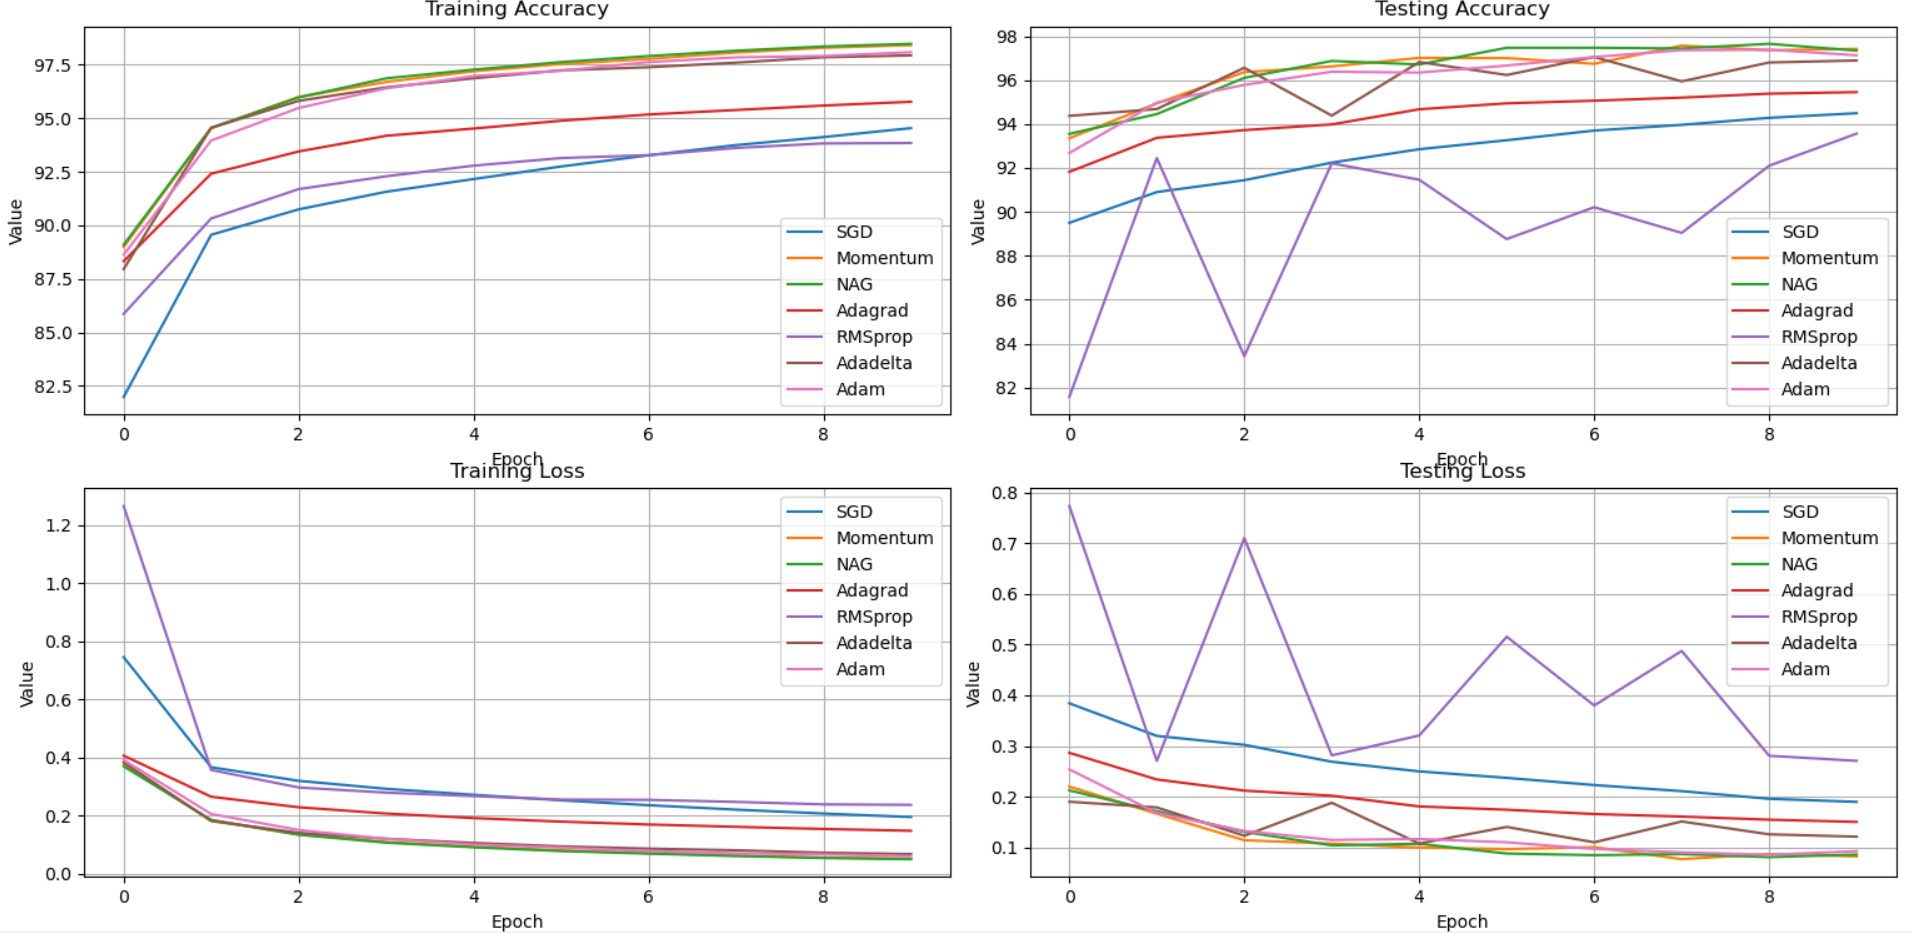

Sure, let's go through each optimization algorithm in simple terms with examples, formulas, and then summarize the differences in a table.

---

## 🔹 1. **Adagrad (Adaptive Gradient Algorithm)**

### **Idea:**
Adagrad adapts the learning rate for each parameter based on the frequency of updates. Parameters with frequent updates get smaller learning rates, and infrequent ones get larger learning rates.

### **Formula:**
Let:
- \( \theta \) be the parameters
- \( g_t \) be the gradient at time step \( t \)
- \( G_t \) be the sum of squares of gradients up to time \( t \)

Update rule:
\[
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot g_t
\]
Where \( G_t = \sum_{i=1}^{t} g_i^2 \)

### **Example:**
If one feature is very frequent (e.g., common word in NLP), its learning rate gets smaller so it doesn't dominate the update.

---

## 🔹 2. **Adadelta**

### **Idea:**
Improves Adagrad by limiting the accumulation of past gradients to a fixed window using an exponentially decaying average. No need to manually set learning rate.

### **Formula:**
\[
E[g^2]_t = \rho \cdot E[g^2]_{t-1} + (1 - \rho) \cdot g_t^2
\]
\[
\Delta \theta_t = - \frac{\sqrt{E[\Delta \theta^2]_{t-1} + \epsilon}}{\sqrt{E[g^2]_t + \epsilon}} \cdot g_t
\]
\[
\theta_{t+1} = \theta_t + \Delta \theta_t
\]

### **Example:**
Automatically adjusts learning rate for each parameter like Adagrad, but without decaying it too much.

---

## 🔹 3. **RMSProp (Root Mean Square Propagation)**

### **Idea:**
Almost same as Adadelta but more widely used. Maintains a moving average of squared gradients to adjust learning rates.

### **Formula:**
\[
E[g^2]_t = \gamma \cdot E[g^2]_{t-1} + (1 - \gamma) \cdot g_t^2
\]
\[
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \cdot g_t
\]

### **Example:**
Used in recurrent neural networks to handle non-stationary objectives.

---

## 🔹 4. **Adam (Adaptive Moment Estimation)**

### **Idea:**
Combines RMSProp (squared gradient average) + momentum (average of gradients). Very popular and usually works well out of the box.

### **Formula:**
- First moment (mean): \( m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t \)
- Second moment (variance): \( v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2 \)
- Bias-corrected:
  \[
  \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
  \]
- Update rule:
  \[
  \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{m}_t
  \]

### **Example:**
Best default choice for most deep learning tasks (e.g., CNN, RNN, transformers).

---

## 🔹 5. **NAG (Nesterov Accelerated Gradient)**

### **Idea:**
Improves standard momentum by looking ahead — computes gradient not at current parameters, but at the estimated future position.

### **Formula:**
- Standard momentum:
  \[
  v_t = \gamma v_{t-1} + \eta \cdot g_t, \quad \theta_{t+1} = \theta_t - v_t
  \]
- NAG:
  \[
  v_t = \gamma v_{t-1} + \eta \cdot \nabla f(\theta_t - \gamma v_{t-1})
  \]
  \[
  \theta_{t+1} = \theta_t - v_t
  \]

### **Example:**
More accurate update because it adjusts based on where the parameter is going, not where it is now.

---

## 🔸 Comparison Table

| Optimizer  | Adapts Learning Rate | Uses Momentum | Needs Learning Rate | Handles Sparse Data | Notes |
|------------|----------------------|----------------|----------------------|----------------------|-------|
| **Adagrad** | Yes                  | No             | Yes                  | Yes                  | Learning rate shrinks too much |
| **Adadelta**| Yes (decay avg)      | No             | No                   | No                   | No need to set learning rate |
| **RMSProp** | Yes (decay avg)      | No             | Yes                  | No                   | Good for RNNs |
| **Adam**    | Yes (mean + var)     | Yes            | Yes                  | Yes                  | Very popular, combines best of RMSProp and momentum |
| **NAG**     | No                   | Yes (lookahead)| Yes                  | No                   | More accurate than standard momentum |

---

Would you like visual diagrams for these as well?

Sure, let’s break down **Second Order Methods** in **simple terms** and give examples so you can understand how they work and why they’re used.

---

## 🔷 What are Second Order Methods?

Second order methods use **second-order derivatives** (called **Hessian**) to optimize a function. While first-order methods (like SGD, Adam, etc.) only use the **gradient** (slope) to move toward the minimum of a loss function, second-order methods use **both the slope and the curvature** of the loss function.

---

### 📘 First-order vs Second-order:
- **First-order methods**: Use **gradient** (first derivative) to decide the direction and step size.
- **Second-order methods**: Use **Hessian** (second derivative) to understand **how steep or curved the loss surface is** and adjust the step more precisely.

---

## 🔹 What is the Hessian?

The **Hessian matrix** is a square matrix of second-order partial derivatives. It tells us how the slope (gradient) changes. If the loss function is curving up or down sharply, the Hessian helps us adjust the step size accordingly.


For a function $f(\theta)$, the gradient is:  
$$
\nabla f(\theta)
$$

And the Hessian is:  
$$
H(\theta) = \nabla^2 f(\theta)
$$


   
---

## 🔹 Update Rule for Second Order 

The parameter update rule looks like:  
$$
\theta_{t+1} = \theta_t - H^{-1} \cdot \nabla f(\theta_t)
$$

Where:  
- $ \nabla f(\theta_t) $: gradient at current step  
- $ H^{-1} $: inverse of the Hessian matrix
(Simple Analogy):

Imagine you’re at the top of a hill and want to reach the bottom (minimum of loss function).

- A **first-order method** tells you: “Go downhill in the steepest direction.”
- A **second-order method** tells you: “Also consider how curved the hill is. If the hill flattens out, take a bigger step; if it curves sharply, take a smaller step.”

This extra information helps you reach the bottom **faster and more accurately**, especially when the terrain (loss surface) is complex.

---

## 🔹 Famous Second Order Mehod: **Newton’s Method**

#t$$
\theta_{t+1} = \theta_t - \frac{\nabla f(\theta_t)}{\nabla^2 f(\theta_t)}
$$

In high dimensions, the formula uses matrix form:  
$$
\theta_{t+1} = \theta_t - H^{-1} \cdot \nabla f(\theta_t)
$$


 \nabla f(\theta_t)
\]

Newton’s method finds the exact minimum **faster** than gradient descent, **if** the Hessian is easy to coSuppose your loss function is:  
$$
f(\theta) = \theta^2
$$

Then:  
- Gradient: $ \nabla f(\theta) = 2\theta $  
- Hessian: $ \nabla^2 f(\theta) = 2 $

Now Newton’s update becomes:  
$$
\theta_{t+1} = \theta_t - \frac{2\theta_t}{2} = \theta_t - \theta_t = 0
$$

So in just **one step**, Newton’s method finds the minimum (at $ \theta = 0 $).
 finds the minimum (at \( \theta = 0 \)).

---

## 🔻 Downsides of Second Order Methods

| Disadvantage                        | Why? |
|------------------------------------|------|
| **Computationally expensive**      | Calculating and inverting the Hessian matrix is slow for large models |
| **High memory usage**              | Hessian is a large matrix (size: parameters x parameters) |
| **Not scalable to deep learning**  | Too slow for neural networks with millions of parameters |

---

## ✅ Summary

| Aspect             | First Order (e.g., SGD)     | Second Order (e.g., Newton's) |
|-------------------|-----------------------------|-------------------------------|
| Uses              | Gradient                    | Gradient + Hessian            |
| Speed             | Slower convergence          | Faster convergence            |
| Memory            | Low                         | High                          |
| Computation       | Cheap                       | Expensive                     |
| Use Case          | Deep Learnion's method in Python for a small function. Let me know!

# GD vs Newtons Method

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivatives
def f(theta):
    return theta ** 2

def grad_f(theta):
    return 2 * theta

def hessian_f(theta):
    return 2

# Gradient Descent
def gradient_descent(theta_init, lr, steps):
    theta = theta_init
    path = [theta]
    for _ in range(steps):
        theta = theta - lr * grad_f(theta)
        path.append(theta)
    return path

# Newton's Method
def newtons_method(theta_init, steps):
    theta = theta_init
    path = [theta]
    for _ in range(steps):
        theta = theta - grad_f(theta) / hessian_f(theta)
        path.append(theta)
    return path

# Initialize
theta_init = 4
lr = 0.1
steps = 10

gd_path = gradient_descent(theta_init, lr, steps)
nm_path = newtons_method(theta_init, steps)

# Create a plot
theta_vals = np.linspace(-5, 5, 400)
f_vals = f(theta_vals)

plt.figure(figsize=(10, 6))
plt.plot(theta_vals, f_vals, label='f(theta) = theta^2', color='blue')
plt.plot(gd_path, [f(t) for t in gd_path], 'o-', label='Gradient Descent', color='green')
plt.plot(nm_path, [f(t) for t in nm_path], 's--', label="Newton's Method", color='red')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Comparison of Gradient Descent and Newton’s Method')
plt.xlabel('Theta')
plt.ylabel('f(Theta)')
plt.legend()
plt.grid(True)
plt.show()


The graph shows how **Gradient Descent** (green) and **Newton's Method** (red) reach the minimum of the function $$ f(\theta) = \theta^2 \)$$:

- **Gradient Descent** takes small, steady steps toward the minimum.
- **Newton’s Method** jumps directly to the minimum in just one step because it uses the curvature (second derivative) information.

This is a great example of how second-order methods can converge much faster—but remember, they are more computationally expensive in complex models. Let me know if you'd like to try it with another function or want to explore other optimization methods!

# why cant we use netwon raphson method

That's a great question. We **can** use the **Newton-Raphson method**, and in fact, Newton’s method **is** a special case of the Newton-Raphson method applied to optimization. But in **deep learning or large-scale machine learning**, we usually **don’t** use Newton-Raphson. Here's why:

---

## 🔹 What is Newton-Raphson?

Newton-Raphson is a root-finding method used to solve:  
$$
f(x) = 0
$$

In optimization, we apply it to **find where the gradient is zero** (i.e., local minimum or maximum), so we use:  
$$
f'(\theta) = 0
$$

Newton-Raphson update formula:  
$$
\theta_{t+1} = \theta_t - \frac{f'(\theta_t)}{f''(\theta_t)}
$$

This is exactly like Newton’s method in optimization.

---

## 🔸 Why NOT commonly used in Deep Learning?

| Limitation | Explanation |
|-----------|-------------|
| **Hessian is huge** | Deep learning models have **millions of parameters**. The Hessian matrix would be **millions × millions** in size. Storing and computing it is impractical. |
| **Inversion is costly** | To use Newton-Raphson, we need the **inverse of the Hessian**. That’s very expensive and slow. |
| **Unstable on non-convex loss** | Deep networks have **non-convex loss surfaces**. Newton-Raphson can jump to **saddle points** or **maxima**, not necessarily minima. |
| **Slower per step** | Each Newton-Raphson step is **very expensive**, even if it converges in fewer steps. First-order methods like **Adam** are more efficient overall. |

---

## 🔹 Where Newton-Raphson **is** useful:

- Small-scale problems (e.g., logistic regression on small datasets)
- Convex problems where the Hessian is easy to compute
- Solving equations, not training deep networks

---

## ✅ Summary:

| Method             | Pros                                | Cons                                |
|--------------------|--------------------------------------|--------------------------------------|
| **Gradient Descent** | Simple, scalable, fast per step     | Needs many steps, can be slow to converge |
| **Newton-Raphson**  | Fast convergence with curvature info | Too heavy for deep learning, unstable for complex models |

---

Would you like a Python example of Newton-Raphson solving a small optimization problem to show how it works?

You're absolutely right to question that — let's clear up the confusion.

---

## ✅ **Newton-Raphson Method – Correct Context & Formula**

The **Newton-Raphson method** is originally a **root-finding algorithm**, used to solve:
$$
f(x) = 0
$$

The formula is:  
$$
x_{t+1} = x_t - \frac{f(x_t)}{f'(x_t)}
$$


🔸 This formula is **not** directly used for optimization. It’s used to **find the roots** of equations.

---

## ✅ **Newton’s Method for OptimizaWhen we want to **minimize** a function $L(\theta)$, we find where the **gradient is zero**:  
$$
\nabla L(\theta) = 0
$$

Now, apply Newton-Raphson to the **gradient** (which is a new function we're solving to be zero):  
$$
\theta_{t+1} = \theta_t - \frac{\nabla L(\theta_t)}{\nabla^2 L(\theta_t)}
$$

✔ So here’s the correct formula for **Newton’s method in optimization**:  
$$
\boxed{\theta_{t+1} = \theta_t - \left[\nabla^2 L(\theta_t)\right]^{-1} \nabla L(\theta_t)}
$$

- $ \nabla L(\theta_t) $: Gradient (first derivative)  
- $ \nabla^2 L(\theta_t) $: Hessian (second derivative)
vative)

So yes — **Newton’s method for optimization absolutely does use the second-order derivative** (the Hessian matrix). When people say "Newton-Raphson" in optimization, they’re referring to this second-order method adapted to minimize functions.
| Method                        | Purpose             | Formula                                                                 | Uses 2nd Derivative? |
|------------------------------|---------------------|-------------------------------------------------------------------------|----------------------|
| Newton-Raphson               | Solving $f(x) = 0$  | $x_{t+1} = x_t - \frac{f(x_t)}{f'(x_t)}$                                | ❌                   |
| Newton’s Method (Optimization) | Minimize $L(\theta)$ | $\theta_{t+1} = \theta_t - [\nabla^2 L(\theta_t)]^{-1} \nabla L(\theta_t)$ | ✅                   |
nabla L(\theta_t)\) | ✅ |

---

Let me know if you want to see how this optimization version works with a real function in code!

Sure! Let's break down the **saddle point problem** in neural networks in a very simple way.

---

## ✅ What is a Saddle Point?

A **saddle point** is a point on the loss surface (or cost function) where:

- The gradient is **zero** (like a minimum or maximum),
- But it is **not a true minimum**,
- It looks like a **valley in one direction** and a **hill in another**.

### Visual Example (2D Intuition):

Imagine you're sitting on a **horse saddle**:

- Forward and backward: the surface curves **upward** (like a hill),
- Left and right: it curves **downward** (like a valley).

That’s exactly a **saddle point**.

---

## ✅ Why is it a problem in Neural Networks?

In deep neural networks:

- The **loss function** (used to measure error) is very complex and **non-convex**.
- That means it can have many **local minima**, **maxima**, and **saddle points**.
- At a saddle point, the **gradient is 0**, so gradient-based algorithms (like SGD, Adam) may **get stuck** or **slow down**, thinking they’re at a minimum.

This slows down training or may even stop the model from improving.

---

## ✅ Example (Simple Math)

Let’s take a simple function:  
$$
f(x, y) = x^2 - y^2
$$

- Gradient:  
  $$
  \frac{\partial f}{\partial x} = 2x,\quad \frac{\partial f}{\partial y} = -2y
  $$
- At (0, 0), gradient = (0, 0) → a **critical point**
- But:  
  - Along x-axis: $f(x, 0) = x^2$ → looks like a **minimum**  
  - Along y-axis: $f(0, y) = -y^2$ → looks like a **maximum**

So, (0, 0) is a **saddle point**.

---

## ✅ In Neural Networks

In high-dimensional models like neural nets, most critical points (where gradient = 0) are **not minima**, but **saddle points**.

> As the number of parameters increases (millions in deep learning), **saddle points become much more common than local minima**.

This makes optimization harder because:

- Optimizers might **slow down** near saddle points.
- The loss might **flatten out**, making gradients very small (vanishing gradient effect).

---

## ✅ Solutions to Handle Saddle Points

| Method | Explanation |
|--------|-------------|
| **Momentum** | Helps escape saddle points by carrying past velocity. |
| **Adam, RMSprop** | Use adaptive learning rates to escape flat or steep regions. |
| **Adding noise** | SGD naturally has noise; helps jump out of saddle points. |
| **Second-order methods** | Use curvature (Hessian) to identify saddle points, but expensive. |

---

## ✅ Summary

- A **saddle point** is a place where the gradient is zero but it's **not a minimum**.
- In deep networks, saddle points are **very common** due to high dimensions.
- They can **stall or slow down training**.
- Techniques like **momentum**, **Adam**, or **noisy gradients** help avoid getting stuck there.

---

Would you like me to plot a 3D saddle surface or show how optimization behaves near a saddle point in code?

# visualizing the model 3D surface 

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Subset

# 1. Load a small sample of MNIST (for speed)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
full_train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
subset_indices = torch.arange(0, 1000)
train_dataset = Subset(full_train_dataset, subset_indices)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1000, shuffle=True)

# 2. Simple model with flattened weights
class FlattenedModel(nn.Module):
    def __init__(self):
        super(FlattenedModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 20)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

    def get_weights(self):
        return torch.cat([p.data.view(-1) for p in self.parameters()])

    def set_weights(self, new_weights):
        current_index = 0
        for p in self.parameters():
            shape = p.data.shape
            size = p.numel()
            p.data = new_weights[current_index:current_index+size].view(shape).clone()
            current_index += size

# 3. Capture weight trajectory of optimizer
def track_weights(optimizer_name):
    model = FlattenedModel().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = {
        'SGD': optim.SGD(model.parameters(), lr=0.01),
        'Momentum': optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
        'NAG': optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True),
        'Adam': optim.Adam(model.parameters(), lr=0.001),
    }[optimizer_name]

    weight_list = []

    for epoch in range(10):
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            weight_list.append(model.get_weights().cpu().detach())

    return weight_list

# 4. Project to 2D using PCA-like basis vectors
def compute_surface_and_plot(optimizer_name):
    weight_traj = track_weights(optimizer_name)
    weights = torch.stack(weight_traj)

    center = weights[-1]
    direction1 = (weights[0] - center).numpy()
    direction2 = (weights[len(weights)//2] - center).numpy()

    x_range = np.linspace(-1, 1, 50)
    y_range = np.linspace(-1, 1, 50)
    loss_surface = np.zeros((50, 50))

    model = FlattenedModel().to(device)
    criterion = nn.CrossEntropyLoss()

    for i, dx in enumerate(x_range):
        for j, dy in enumerate(y_range):
            new_w = center + dx * torch.tensor(direction1) + dy * torch.tensor(direction2)
            model.set_weights(new_w.to(device))
            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss_surface[j, i] = loss.item()

    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(x_range, y_range, loss_surface, levels=30, cmap='viridis')
    plt.colorbar()
    
    # Overlay path
    path_x = [(w - center).dot(torch.tensor(direction1)) for w in weights]
    path_y = [(w - center).dot(torch.tensor(direction2)) for w in weights]
    plt.plot(path_x, path_y, color='red', marker='o', label=optimizer_name)

    plt.title(f"Loss Surface & Optimization Path: {optimizer_name}")
    plt.xlabel("Direction 1")
    plt.ylabel("Direction 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run visualization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for opt in ['SGD', 'Momentum', 'NAG', 'Adam']:  # You can include more if needed
    compute_surface_and_plot(opt)


KeyboardInterrupt: 

# A visualization on how the optimizer work on saddle point 

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Saddle function and gradient
def f(x, y):
    return x**2 - y**2

def grad_f(x, y):
    return np.array([2*x, -2*y])

# Gradient Descent with clamping to avoid divergence
def gradient_descent(start, lr=0.1, steps=30):
    path = [start]
    point = start.copy()
    for _ in range(steps):
        grad = grad_f(point[0], point[1])
        point = point - lr * grad
        # Clamp values to keep within visible surface
        point = np.clip(point, -2, 2)
        path.append(point.copy())
    return np.array(path)

# Create surface
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Saddle surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

# Axis labels
ax.set_title("3D Saddle Surface: f(x, y) = x² - y²")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

# Set consistent axes limits
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-5, 5)

# Gradient descent paths
start_points = [np.array([1.5, 1.5]), np.array([-1.5, 1.0]), np.array([1.5, -1]), np.array([-0.25, 0]), np.array([1.5, 0])]
colors = ['red', 'blue', 'orange', 'black', 'green']

for start, color in zip(start_points, colors):
    path = gradient_descent(start, lr=0.1)
    x_path, y_path = path[:, 0], path[:, 1]
    z_path = f(x_path, y_path)
    ax.plot(x_path, y_path, z_path, color=color, marker='o', label=f'Start at {start}')

ax.legend()
plt.tight_layout()
plt.show()
